Importing Libraries

In [1]:
# Import NumPy for numerical computations
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for basic plotting functionalities
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization
import seaborn as sns

# Import Plotly Express for interactive visualization
import plotly.express as px 

# Import Plotly Graph Objects for creating customized plots
import plotly.graph_objects as go 

# Os module for file operations
import os 

# Import warnings to suppress any warnings during execution
import warnings
warnings.filterwarnings('ignore')




In [2]:


df = pd.read_csv("C:\\Users\\cavid\\Downloads\\archive (3)\\Quality of Service 5G.csv")



Data Preprocessing

In [3]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [4]:
df.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%
399,9/3/2023 10:06,User_400,Web_Browsing,-113 dBm,0 ms,0.1 Mbps,0.1 Mbps,70%


In [5]:
df.columns

Index(['Timestamp', 'User_ID', 'Application_Type', 'Signal_Strength',
       'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth',
       'Resource_Allocation'],
      dtype='object')

In [6]:
df.shape

(400, 8)

In [7]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Timestamp                7
User_ID                400
Application_Type        11
Signal_Strength         84
Latency                 87
Required_Bandwidth     188
Allocated_Bandwidth    194
Resource_Allocation      9
dtype: int64

Data Cleaning and Transformation

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
import re

# Function to convert bandwidth to Mbps
def convert_bandwidth_to_mbps(bandwidth):
    if 'Mbps' in bandwidth:
        return float(bandwidth.split()[0])
    elif 'Kbps' in bandwidth:
        return float(bandwidth.split()[0]) / 1000
    else:
        return float('NaN')  # handle invalid cases

# Appling conversion to the Required_Bandwidth and Allocated_Bandwidth columns
df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_bandwidth_to_mbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_bandwidth_to_mbps)


In [12]:
# Remove ' dBm' from the 'Signal_Strength' column and convert the values to float data type
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)

# Remove ' ms' from the 'Latency' column and convert the values to float data type
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)

# Remove '%' from the 'Resource_Allocation' column, convert the values to float data type, and normalize them between 0 and 1
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').astype(float) / 100


In [13]:
# Calculate the number of missing values in each column of the DataFrame
missing_values = df.isnull().sum()

# Print the total count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    object        
 2   Application_Type     400 non-null    object        
 3   Signal_Strength      400 non-null    float64       
 4   Latency              400 non-null    float64       
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 25.1+ KB


In [15]:
df.describe()

,Timestamp,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2023-09-03 10:03:00,-80.495000,33.825000,3.135512,3.502380,0.747125
min,2023-09-03 10:00:00,-123.000000,0.000000,0.000000,0.000000,0.500000
25%,2023-09-03 10:01:00,-98.000000,21.750000,0.417500,0.417500,0.700000
50%,2023-09-03 10:03:00,-83.000000,31.000000,1.200000,1.350000,0.700000
75%,2023-09-03 10:05:00,-64.000000,45.000000,4.100000,4.425000,0.800000
max,2023-09-03 10:06:00,-40.000000,110.000000,14.500000,15.800000,0.900000
std,NaN,20.701119,21.122139,3.984097,4.460801,0.089823


In [16]:
# Extract columns with object data type and convert them to a list
object_columns = df.select_dtypes(include='object').columns.tolist()

# Extract numerical columns with either int or float data type and convert them to a list
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Object columns:", object_columns)
print("Numerical columns:", numerical_columns)


Object columns: ['User_ID', 'Application_Type']
Numerical columns: ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']


In [17]:
df.head()


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,User_1,Video_Call,-75.0,30.0,10.0,15.00,0.70
1,2023-09-03 10:00:00,User_2,Voice_Call,-80.0,20.0,0.1,0.12,0.80
2,2023-09-03 10:00:00,User_3,Streaming,-85.0,40.0,5.0,6.00,0.75
3,2023-09-03 10:00:00,User_4,Emergency_Service,-70.0,10.0,1.0,1.50,0.90
4,2023-09-03 10:00:00,User_5,Online_Gaming,-78.0,25.0,2.0,3.00,0.85


Exploring Data Through Visuals

In [18]:
df['Application_Type'].value_counts()


Application_Type
Video_Call             58
Web_Browsing           48
Streaming              47
Emergency_Service      47
Background_Download    47
Video_Streaming        47
VoIP_Call              46
Online_Gaming          45
IoT_Temperature        13
Voice_Call              1
File_Download           1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

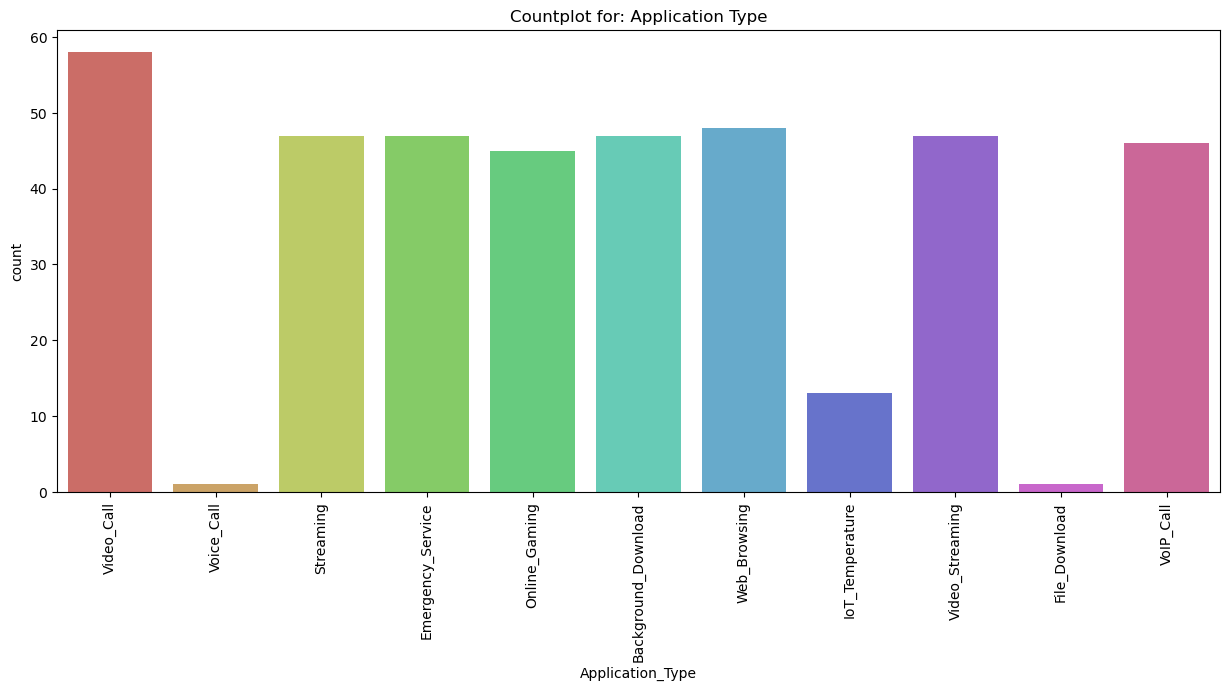

In [19]:
# Set the size of the plot figure
plt.figure(figsize=(15, 6))

# Create a countplot for the 'Application_Type' column using Seaborn
sns.countplot(x='Application_Type', data=df, palette='hls')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Countplot for: Application Type')

plt.show


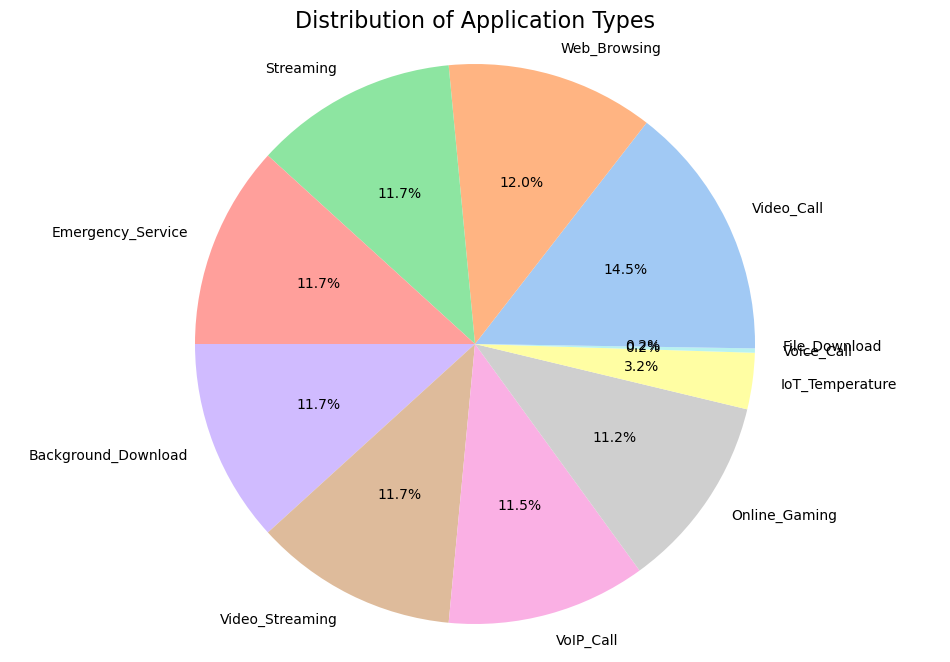

In [20]:
plt.figure(figsize=(12, 8)) 

application_type_counts = df['Application_Type'].value_counts()

colors = sns.color_palette('pastel')[0:len(application_type_counts)]

plt.pie(application_type_counts, labels=application_type_counts.index, colors=colors, autopct='%1.1f%%')

plt.title("Distribution of Application Types", fontsize=16) 

plt.axis('equal')

plt.show()


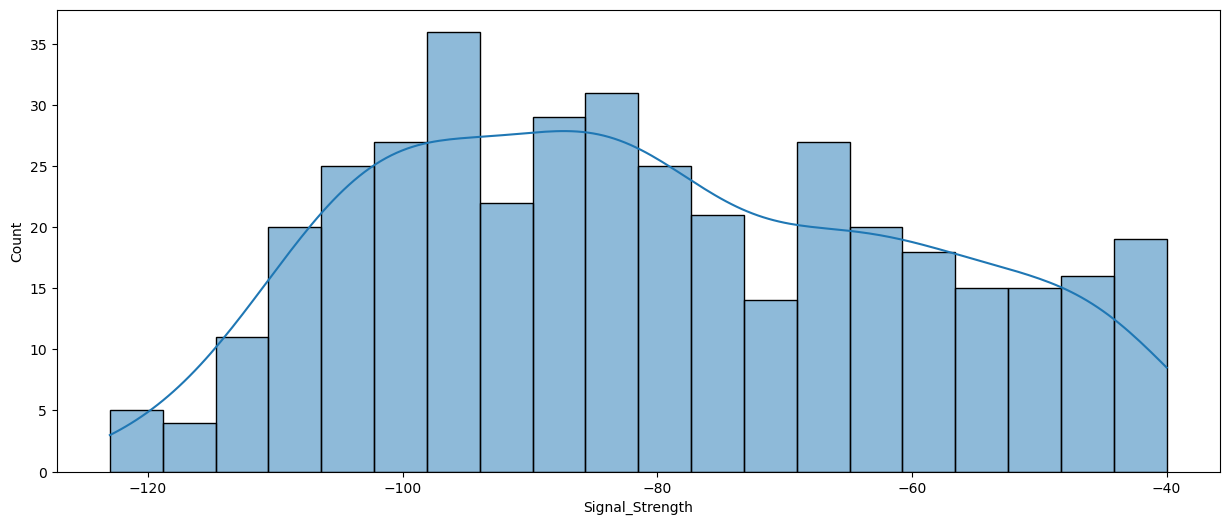

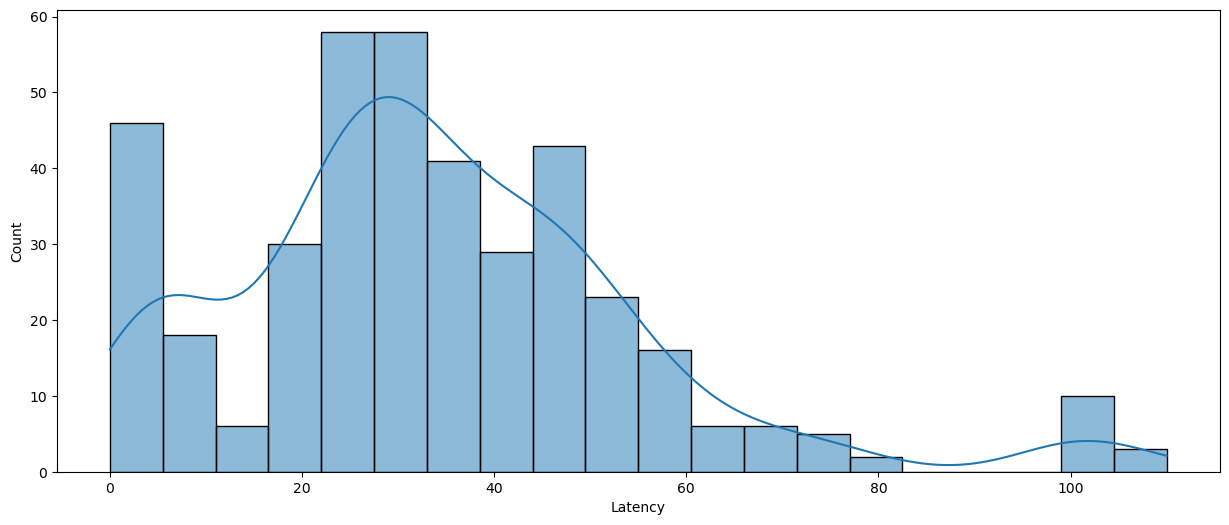

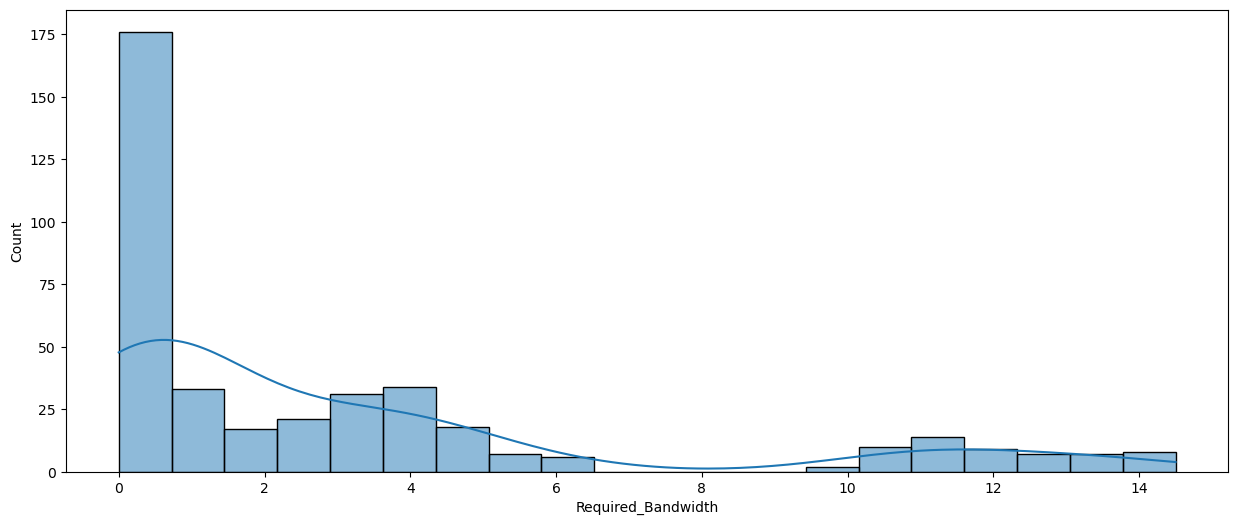

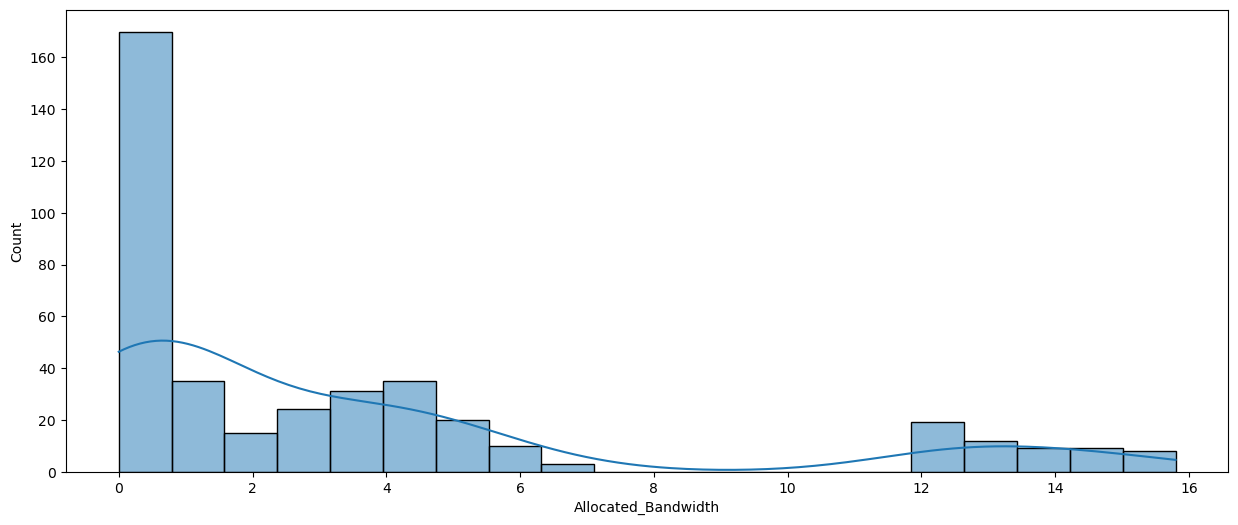

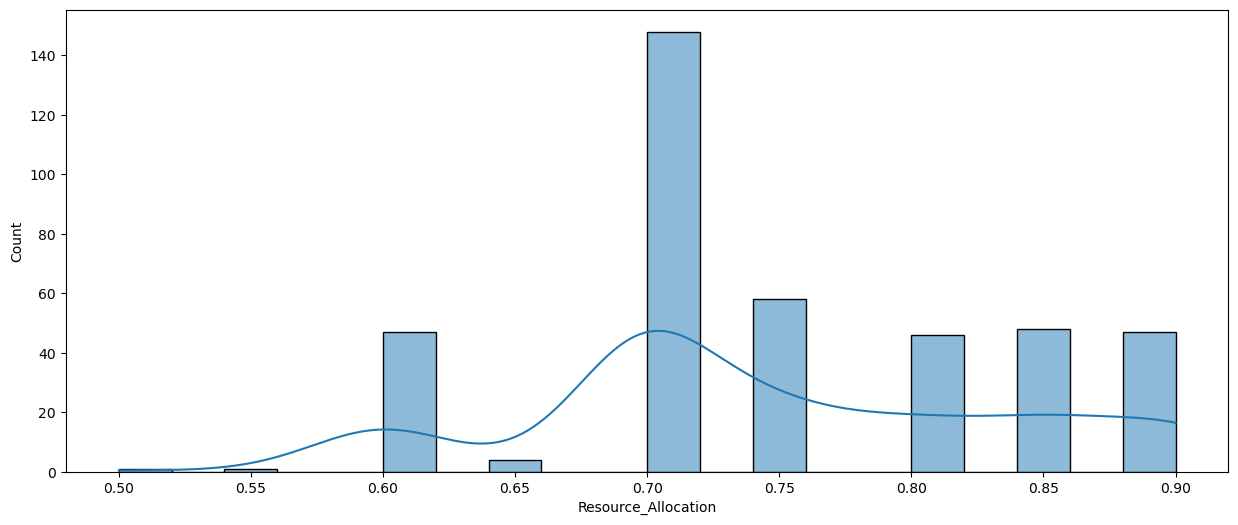

In [21]:
for i in numerical_columns:
 plt.figure(figsize=(15,6))
 sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
 plt.xticks(rotation = 0)
 plt.show()



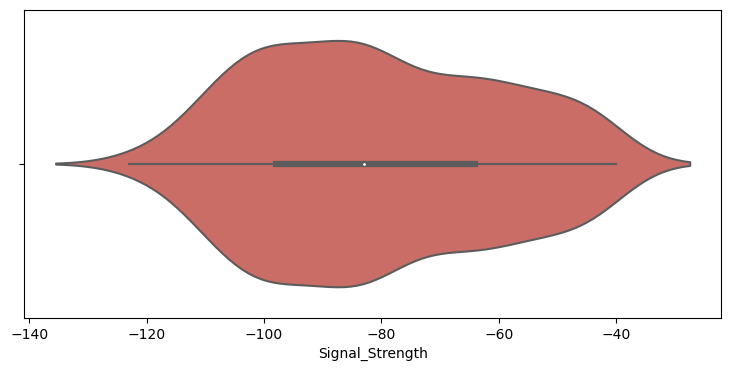

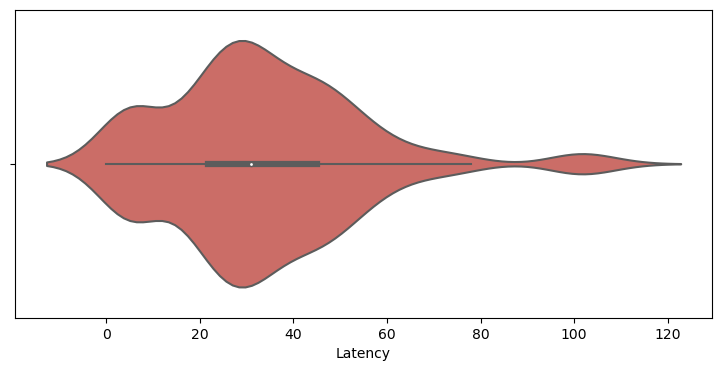

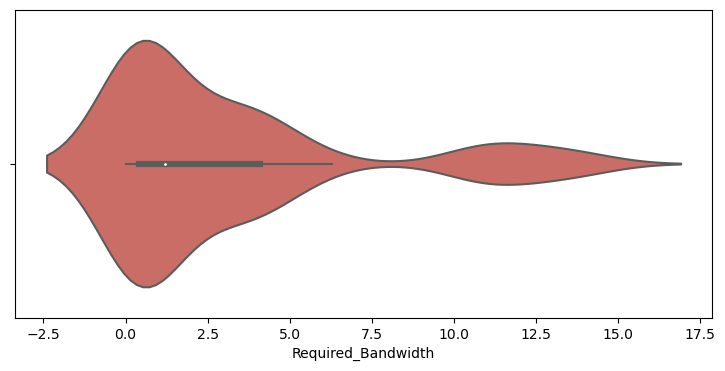

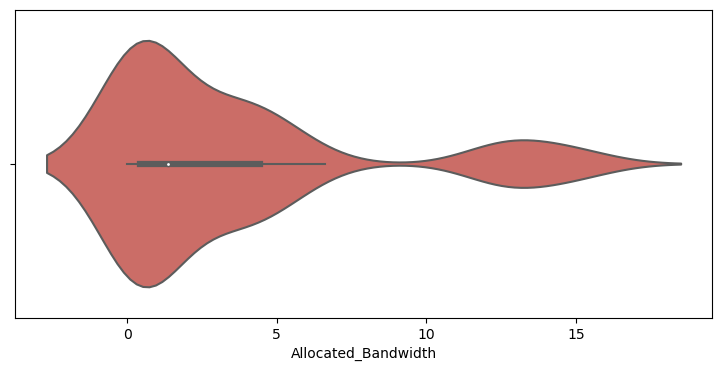

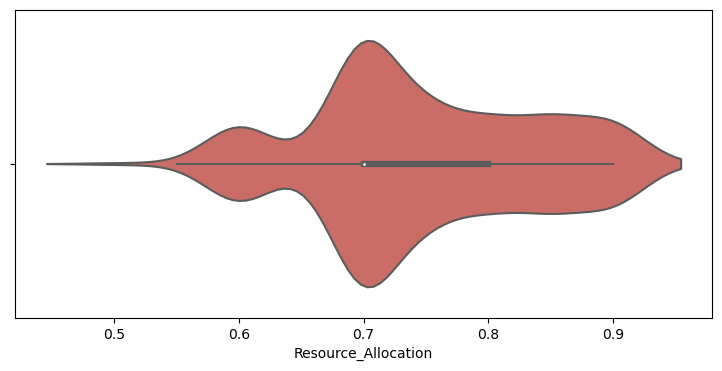

In [22]:
for i in numerical_columns:
 plt.figure(figsize=(9,4))
 sns.violinplot(x=df[i],  palette='hls')
 plt.xticks(rotation = 0)
 plt.show()


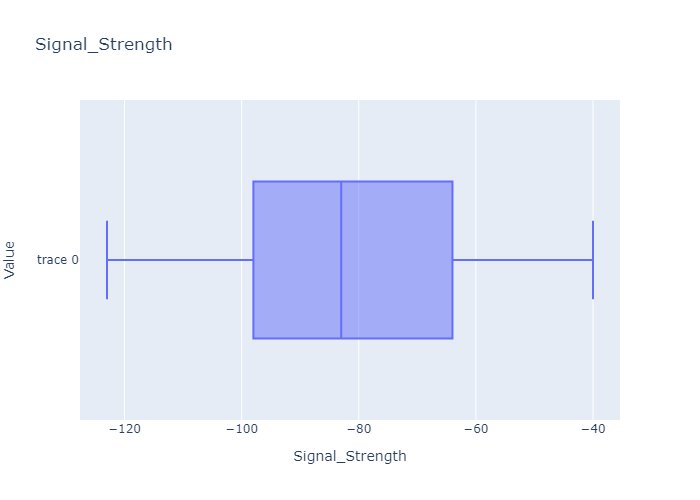

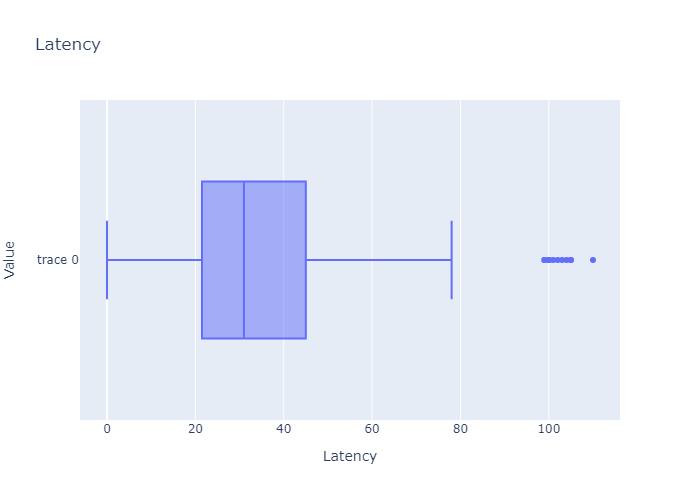

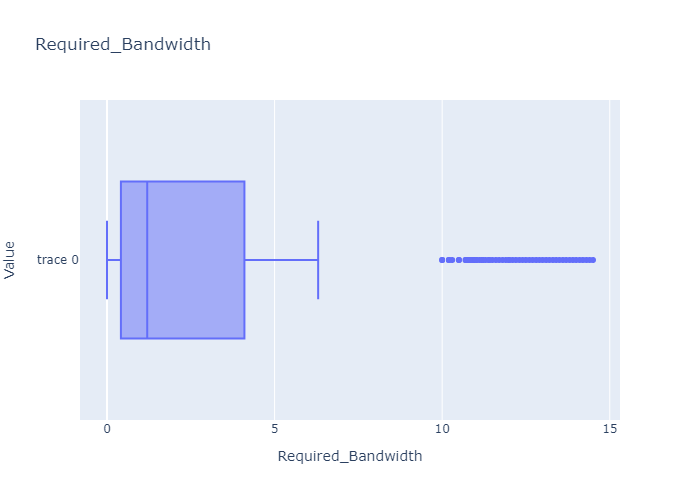

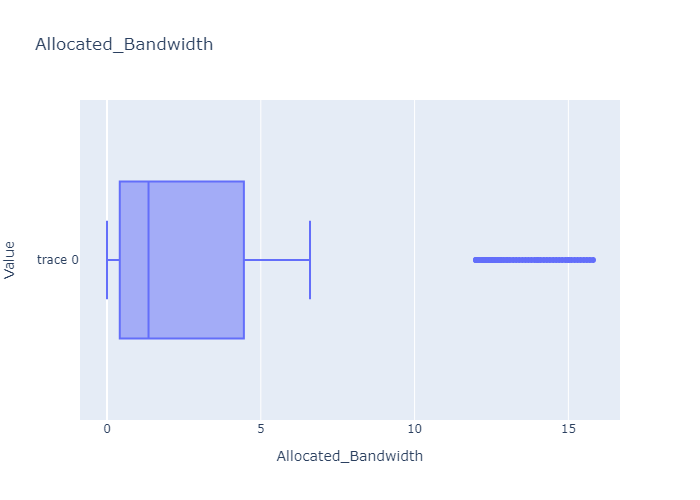

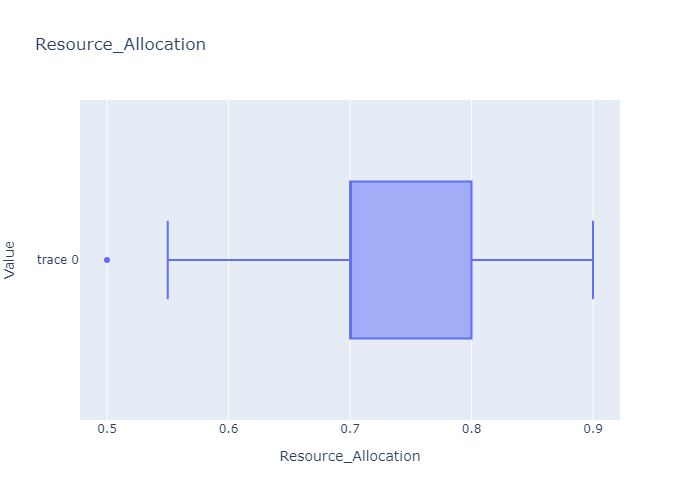

In [59]:
import os
import plotly.graph_objects as go
from IPython.display import Image, display

# Create a directory to save the images
image_dir = 'boxplots'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Loop through numerical columns and create box plots
for i in numerical_columns:
    # Create a box plot for the current numerical column
    fig = go.Figure(data=[go.Box(x=df[i])])
    
    # Customize the layout
    fig.update_layout(
        title=i,  # Set title to the name of the numerical column
        xaxis_title=i,  # Set x-axis title to the name of the numerical column
        yaxis_title="Value"  # Set y-axis title
    )
    
    # Define the image path
    image_path = os.path.join(image_dir, f'{i}_boxplot.png')
    
    # Save the box plot as an image
    fig.write_image(image_path)
    
    # Display the box plot in the notebook
    display(Image(filename=image_path))


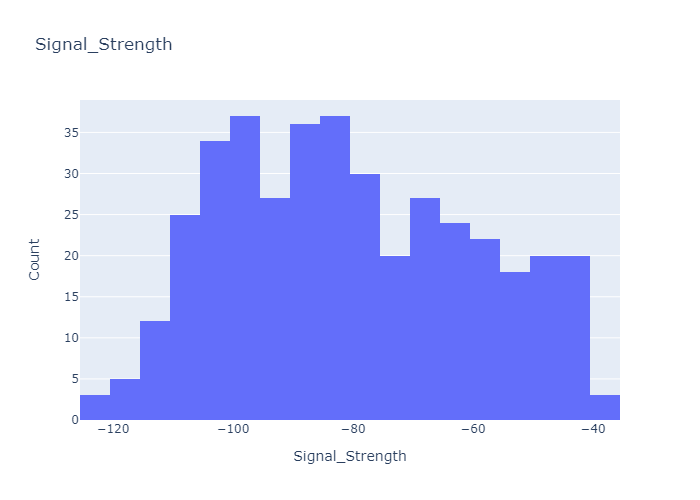

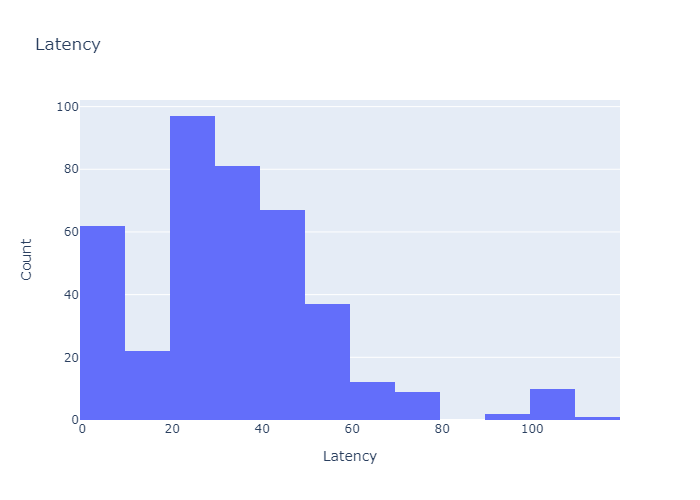

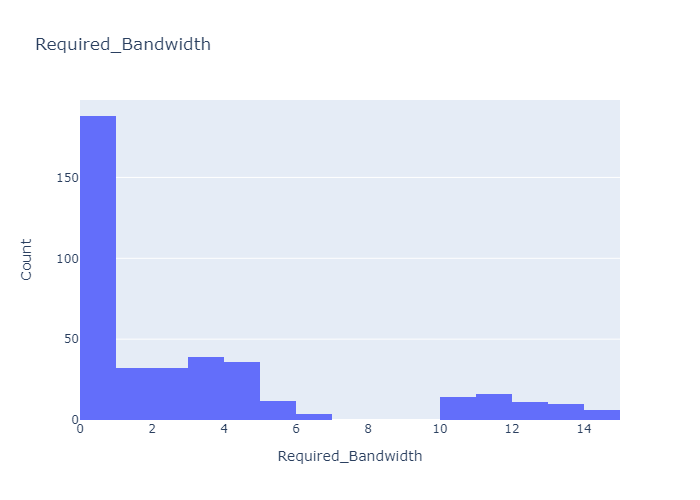

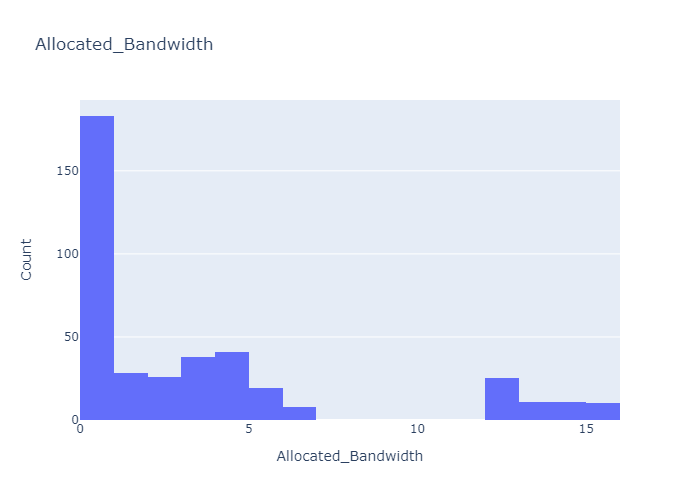

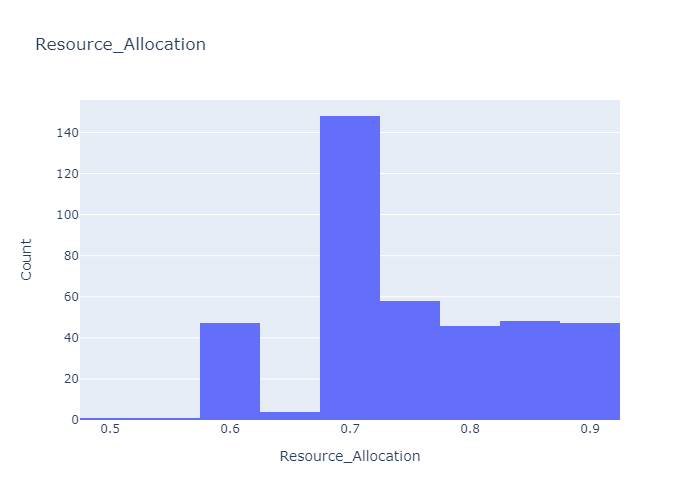

In [24]:

from IPython.display import Image, display

# Create a directory to save the images
image_dir = 'histograms'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Create and save histograms as images
for i in numerical_columns:
    try:
        fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
        fig.update_layout(
            title=i,
            xaxis_title=i,
            yaxis_title="Count"
        )
        image_path = os.path.join(image_dir, f'{i}_histogram.png')
        fig.write_image(image_path)
    except Exception as e:
        print(f"Error occurred while saving histogram for {i}: {str(e)}")

# Display histograms in the notebook
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count"
    )
    image_path = os.path.join(image_dir, f'{i}_histogram.png')
    display(Image(filename=image_path))


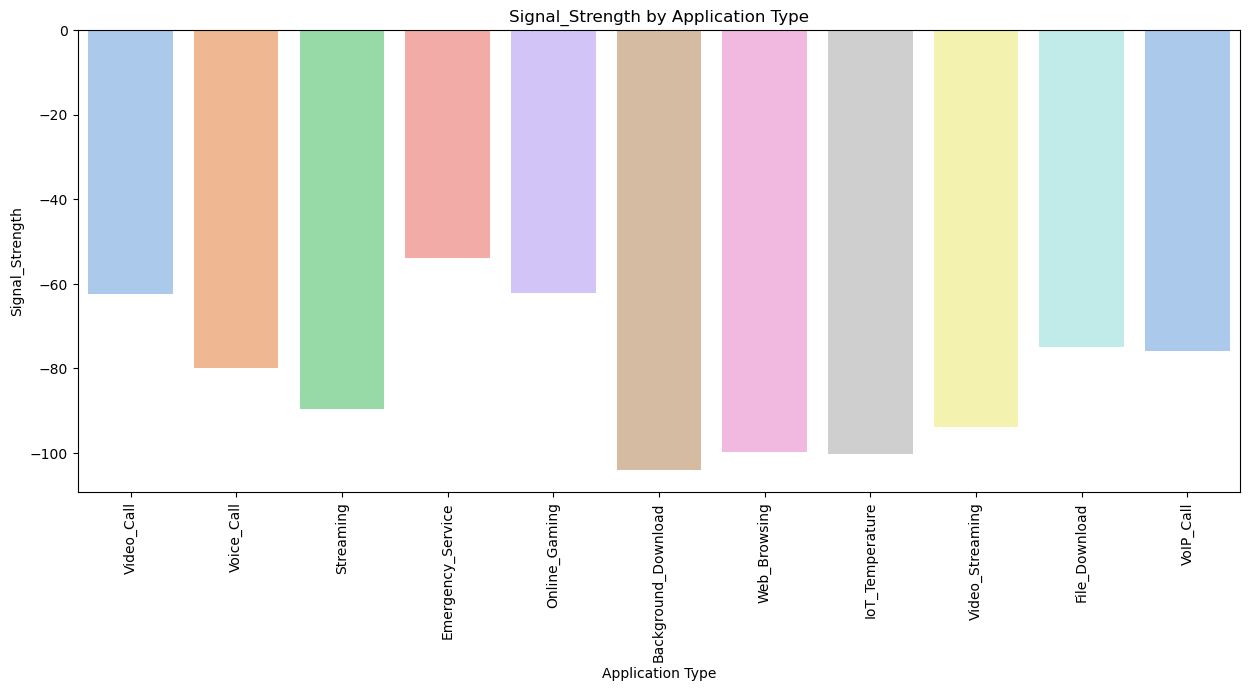

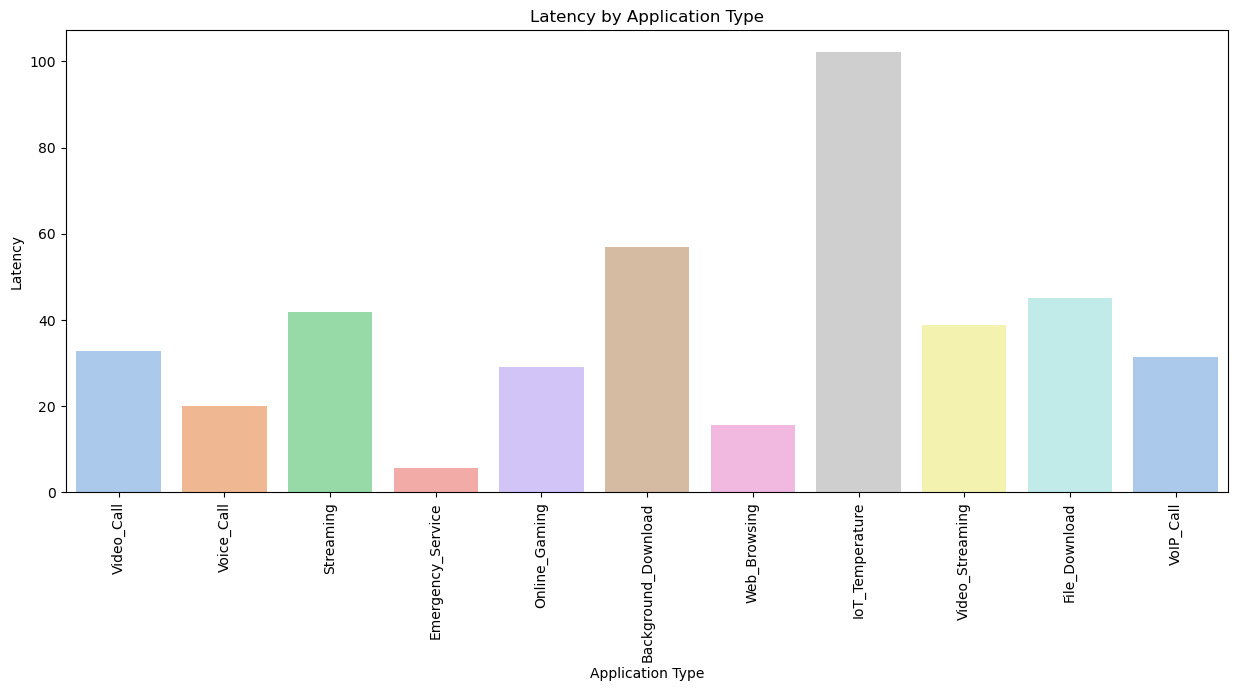

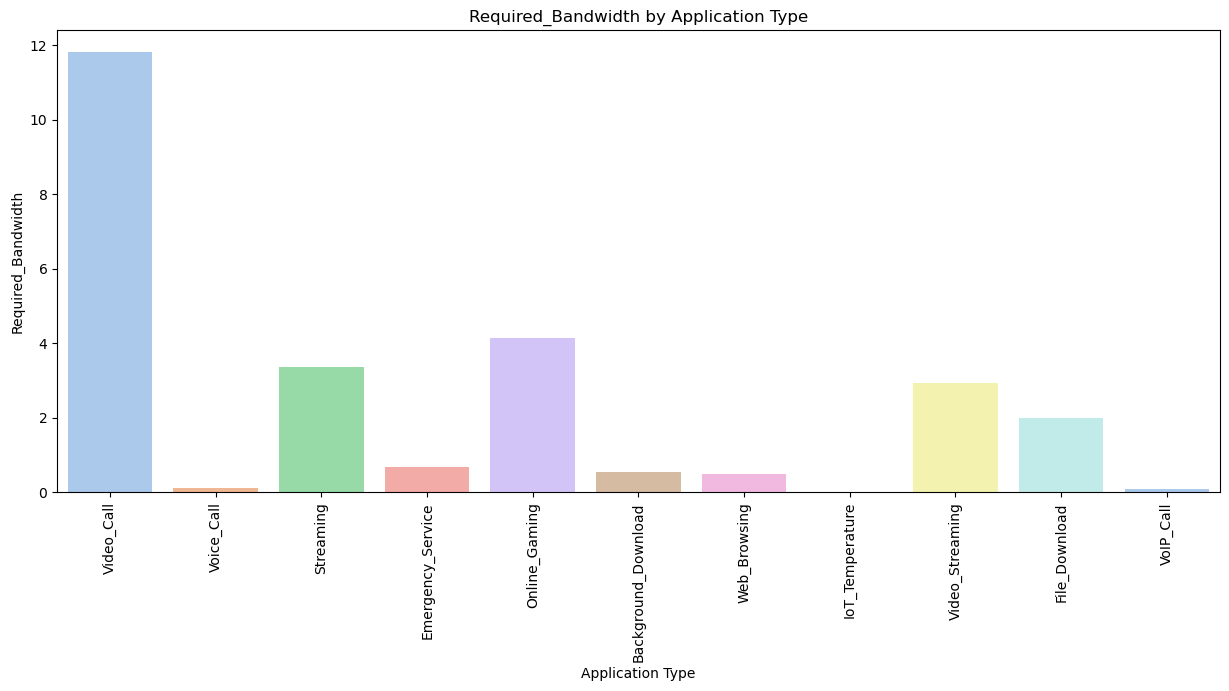

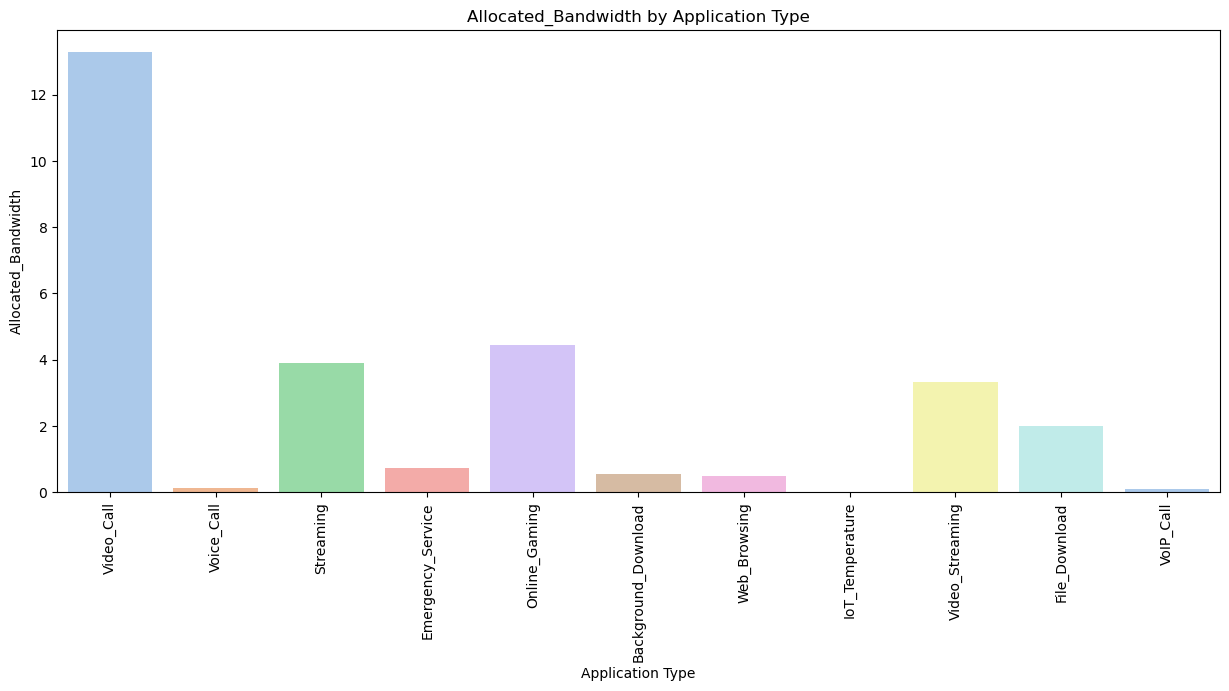

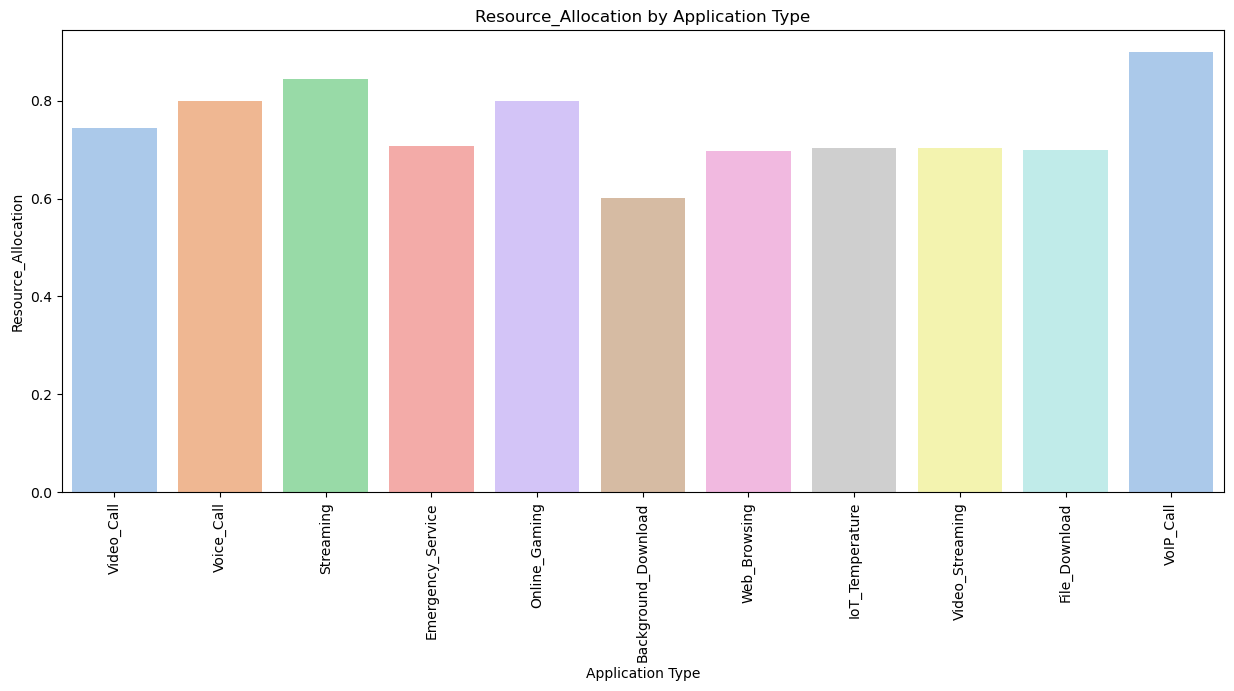

In [25]:
for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.barplot(x='Application_Type', y=i, data=df, ci=None, palette='pastel')
    plt.xticks(rotation=90)
    plt.title(f'{i} by Application Type')
    plt.xlabel('Application Type')
    plt.ylabel(i)
    plt.show()

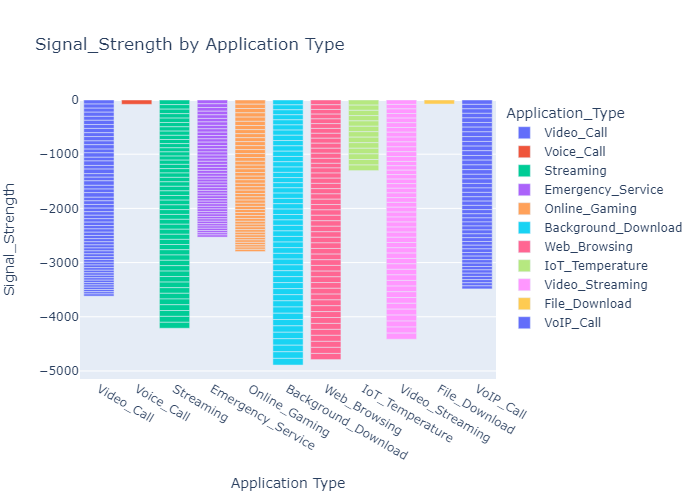

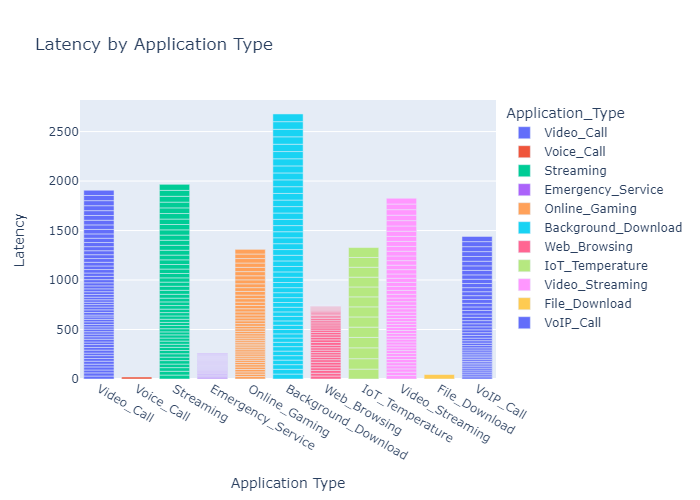

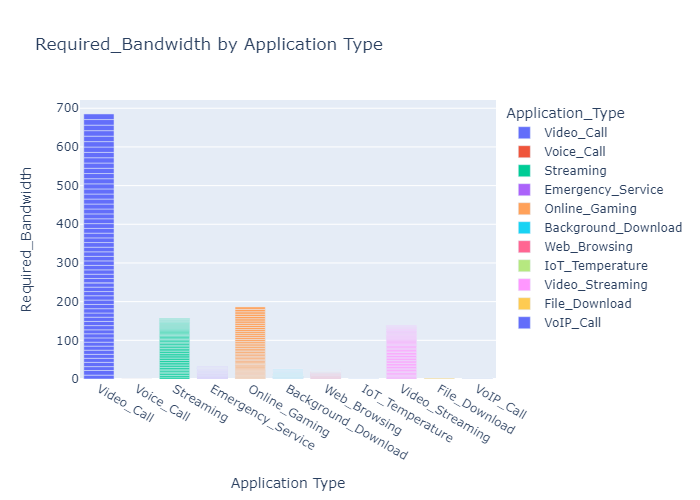

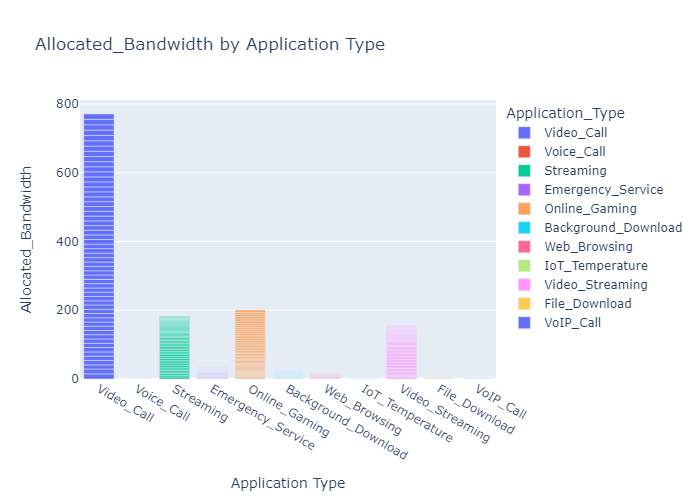

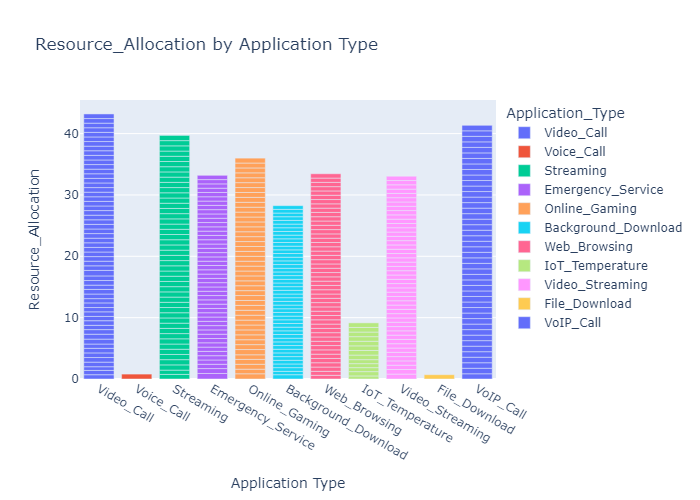

In [26]:

from IPython.display import Image, display

# Create a directory to save the images
image_dir = 'barplots'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Create and save bar plots as images
for i in numerical_columns:
    try:
        fig = px.bar(df, x='Application_Type', y=i, color='Application_Type', 
                     title=f'{i} by Application Type')
        fig.update_layout(xaxis_title='Application Type', yaxis_title=i)
        image_path = os.path.join(image_dir, f'{i}_barplot.png')
        fig.write_image(image_path)
    except Exception as e:
        print(f"Error occurred while saving bar plot for {i}: {str(e)}")

# Display bar plots in the notebook
for i in numerical_columns:
    fig = px.bar(df, x='Application_Type', y=i, color='Application_Type', 
                 title=f'{i} by Application Type')
    fig.update_layout(xaxis_title='Application Type', yaxis_title=i)
    image_path = os.path.join(image_dir, f'{i}_barplot.png')
    display(Image(filename=image_path))


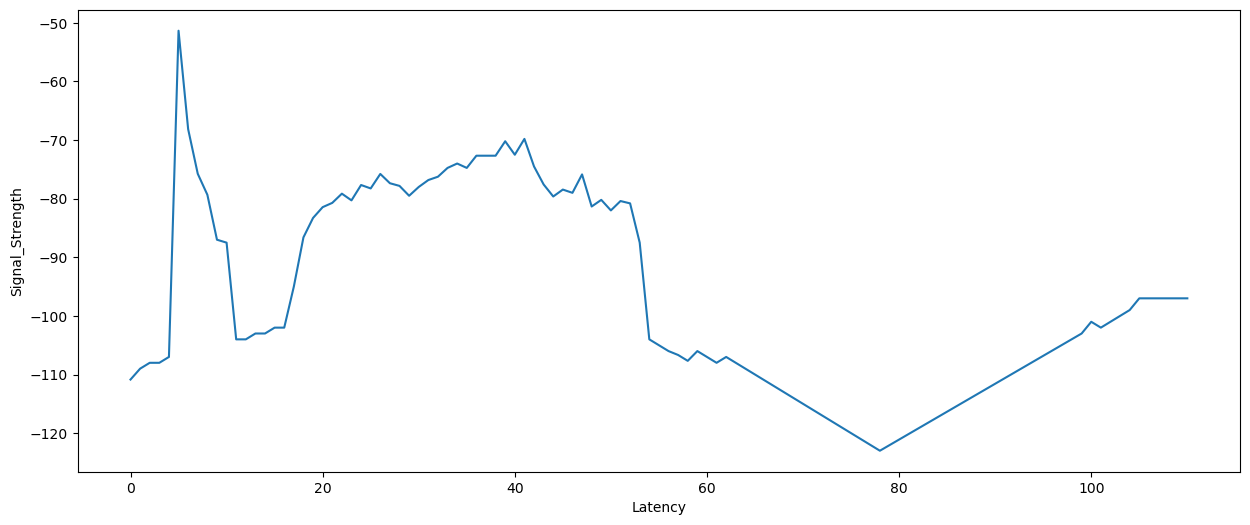

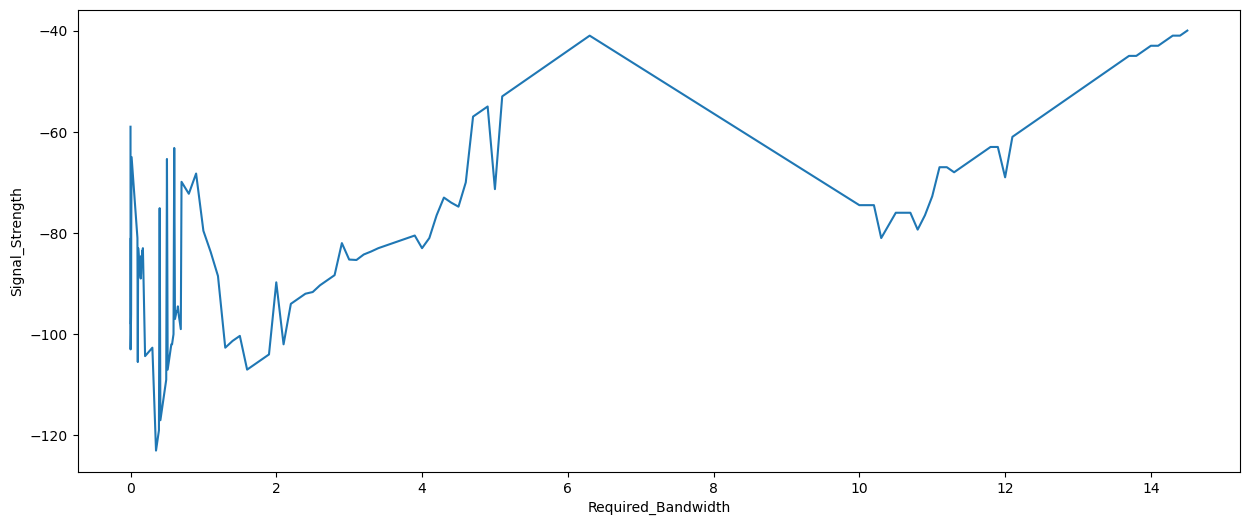

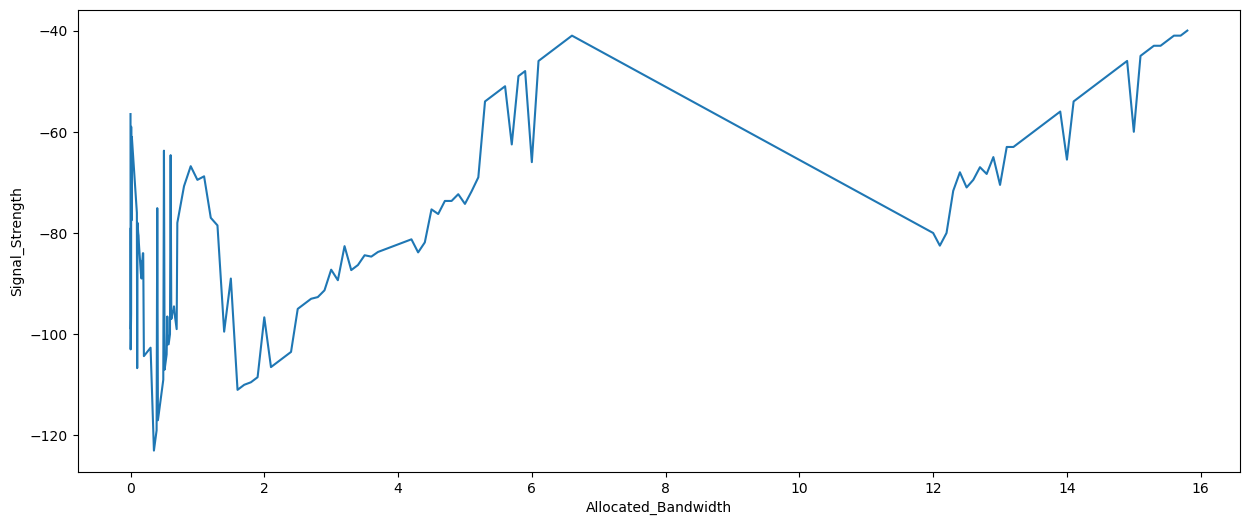

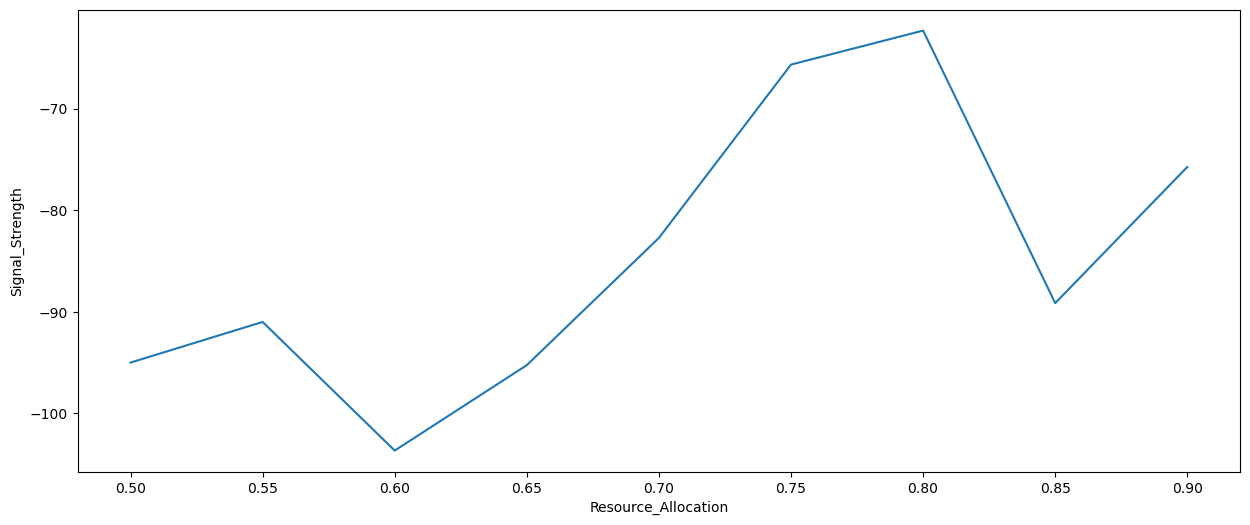

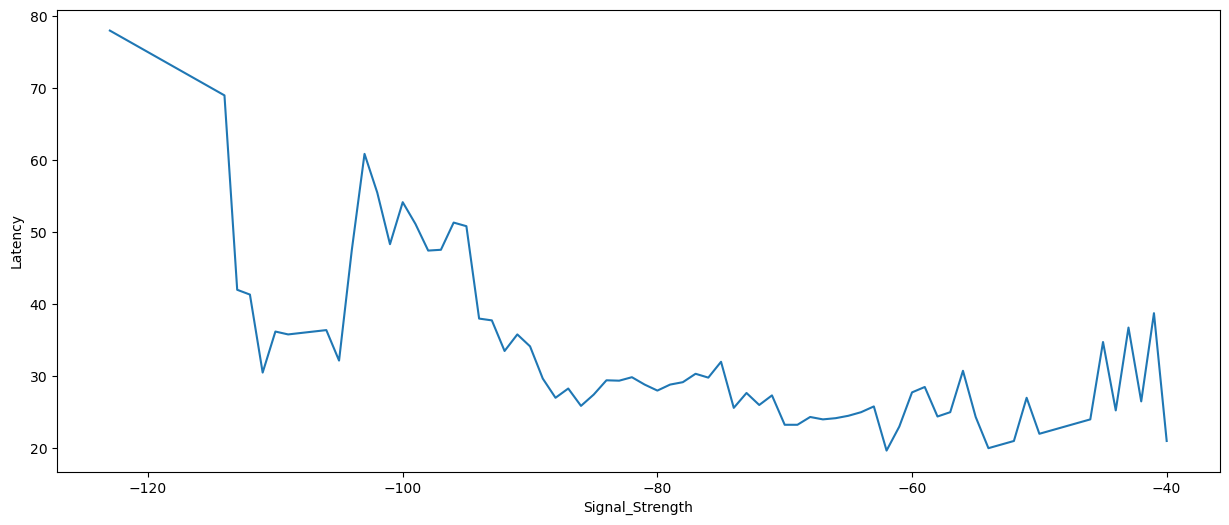

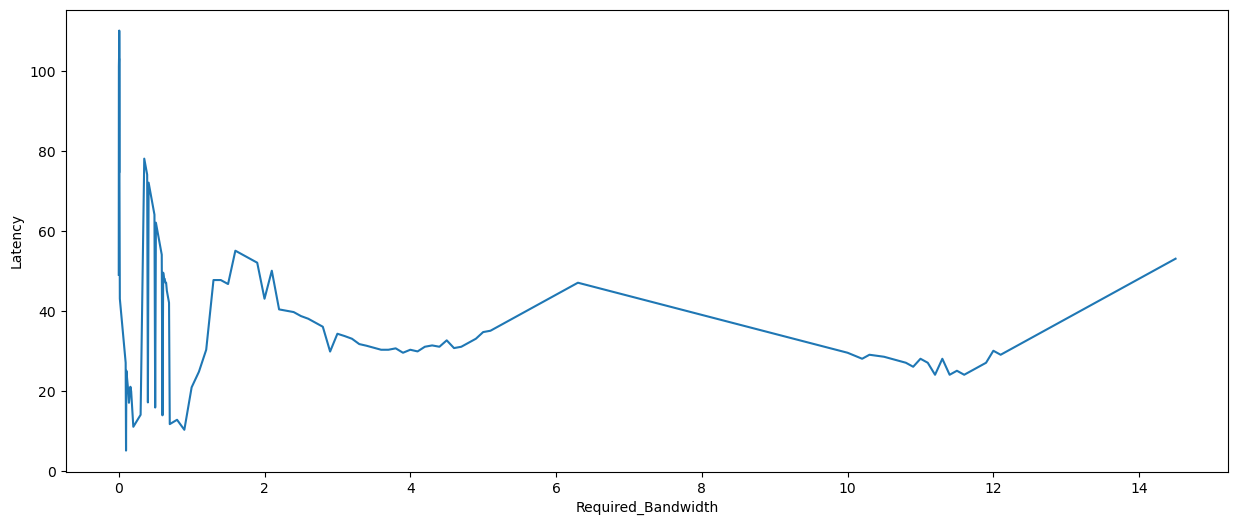

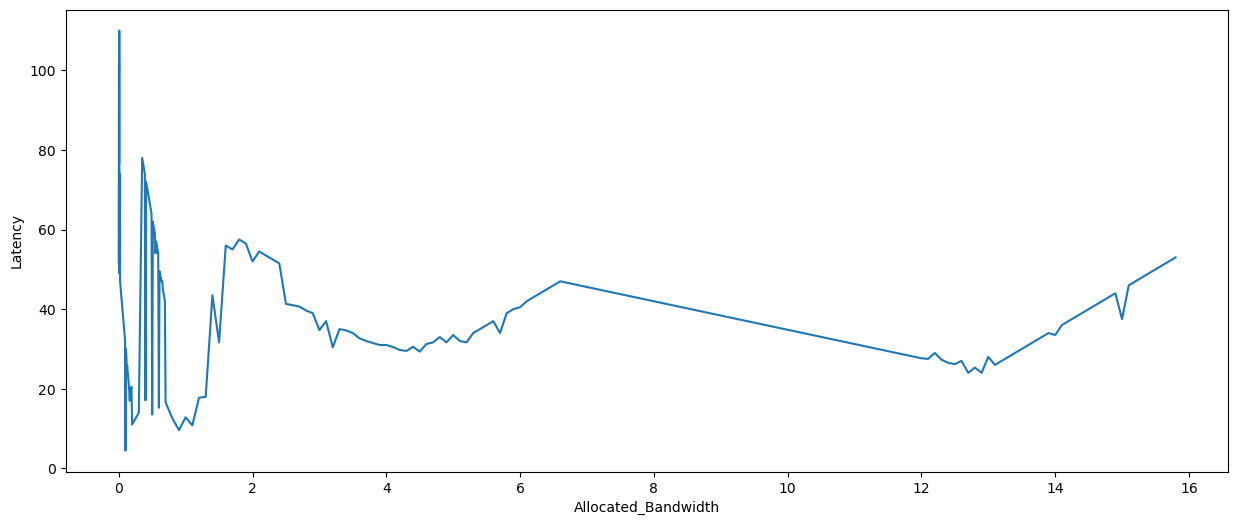

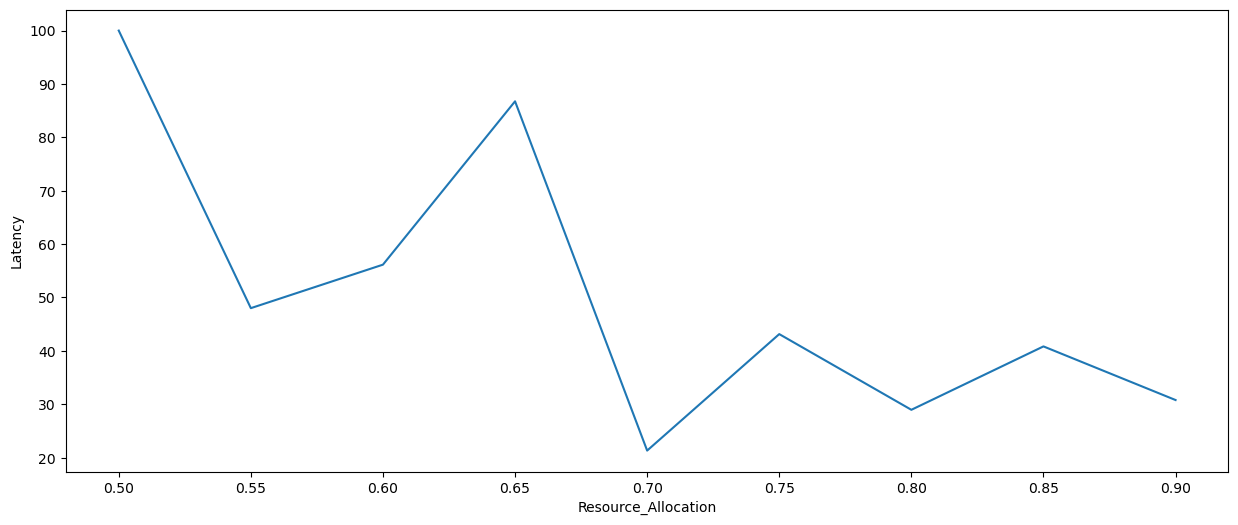

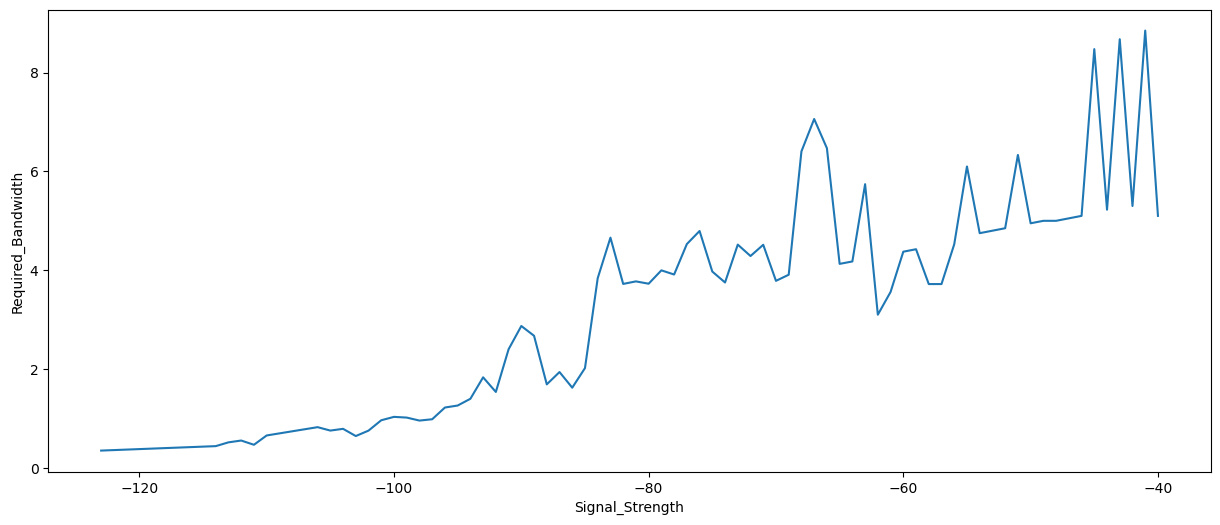

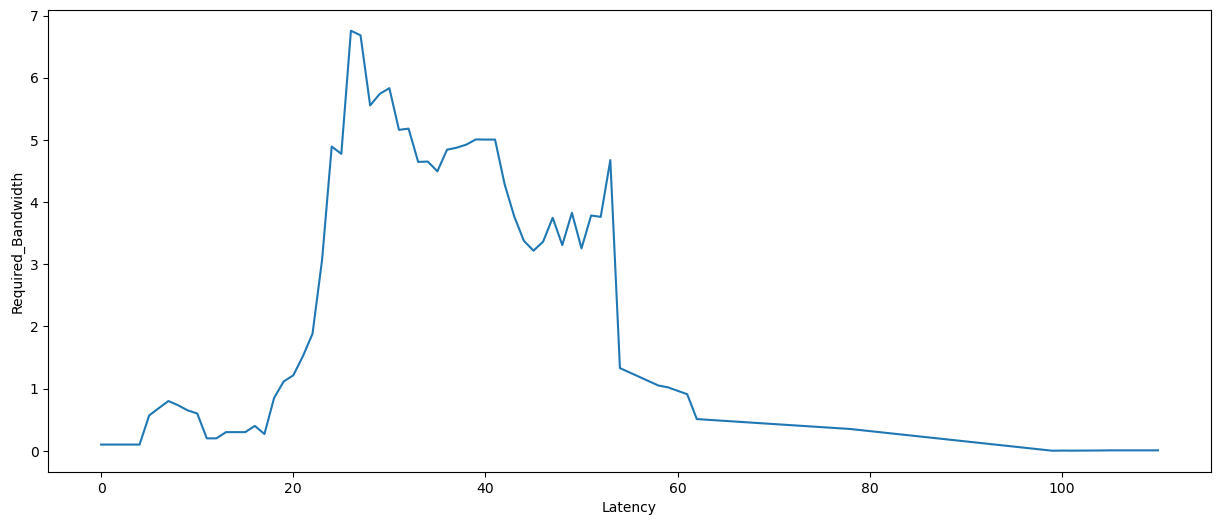

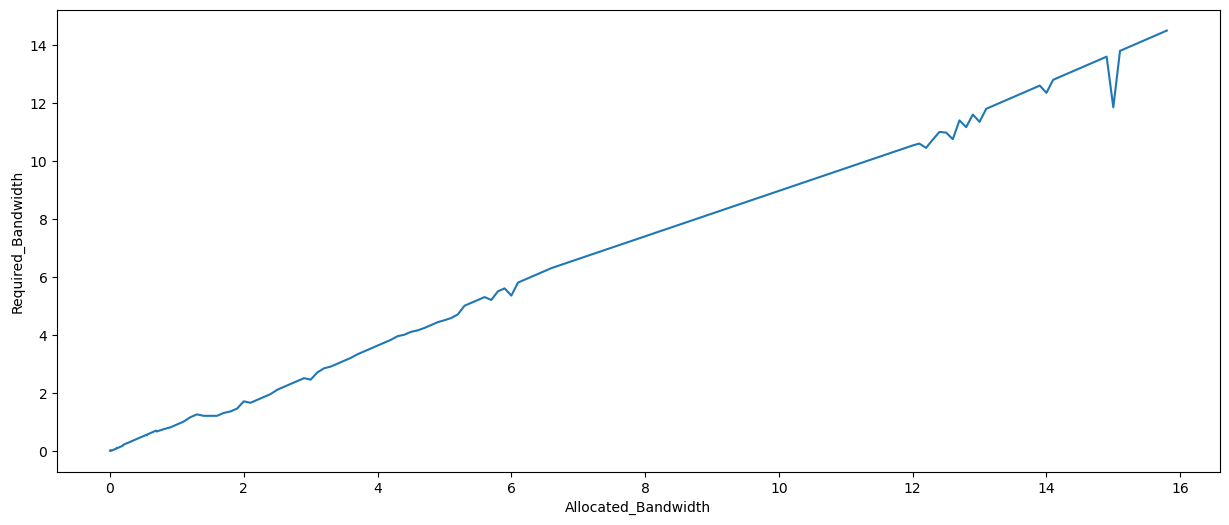

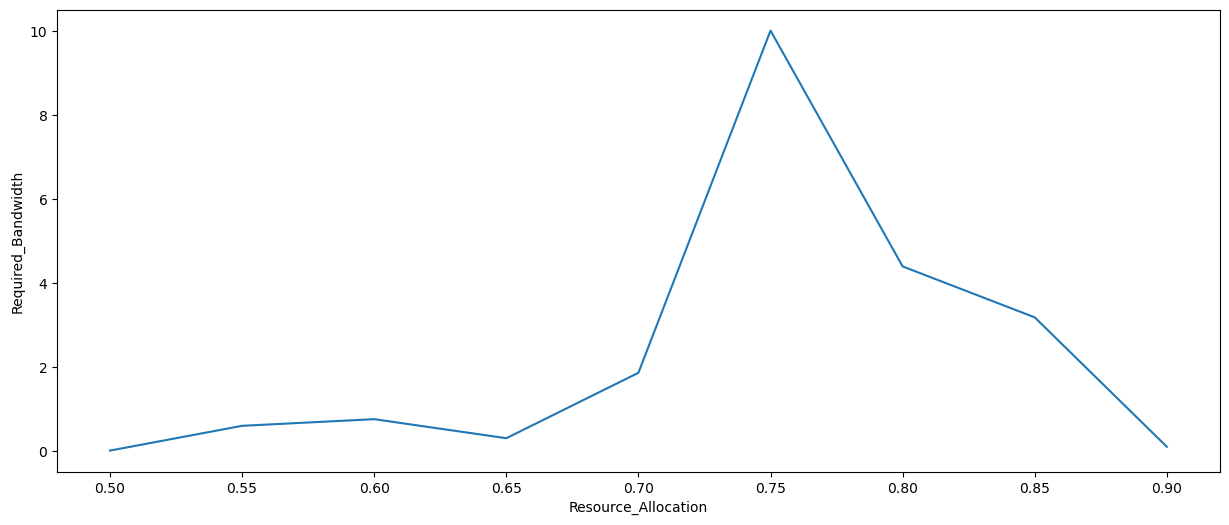

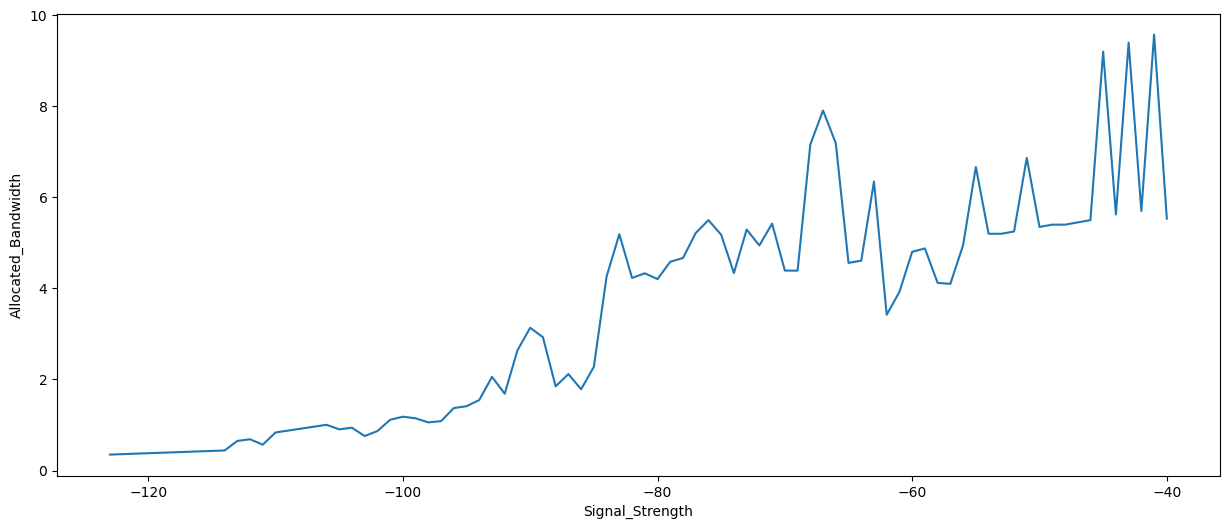

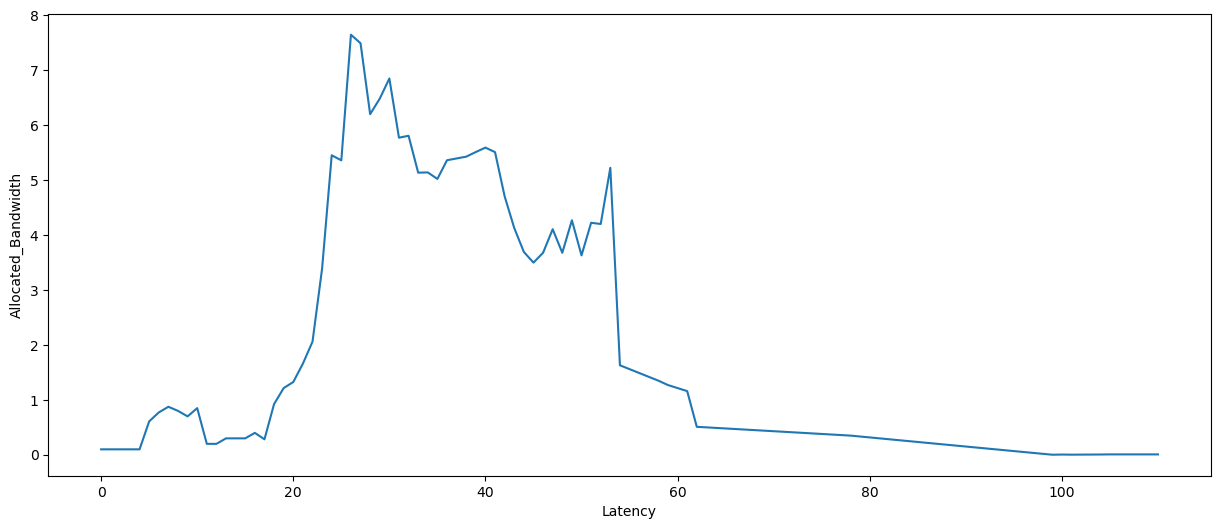

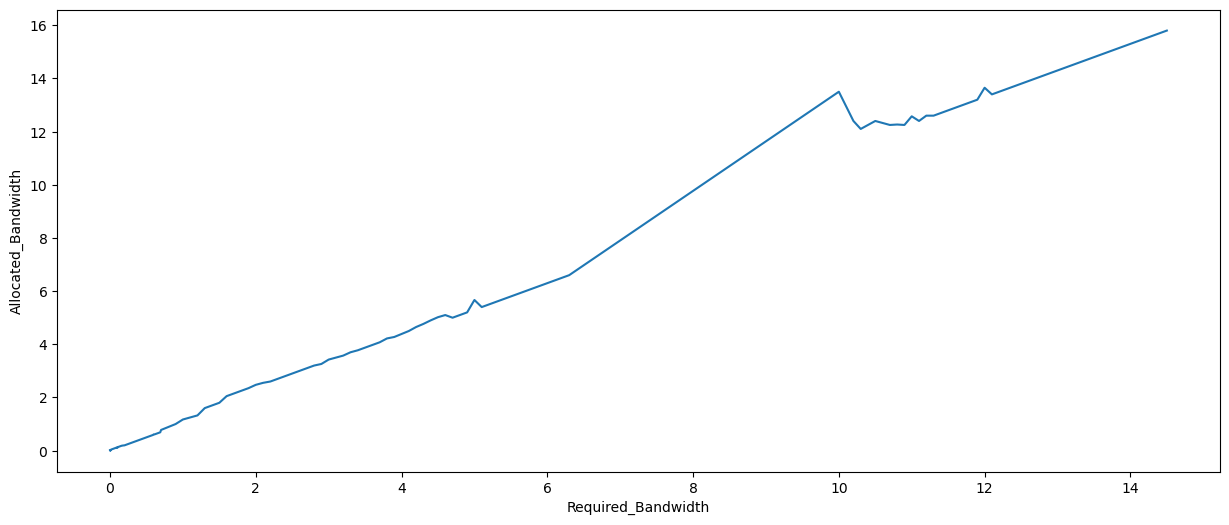

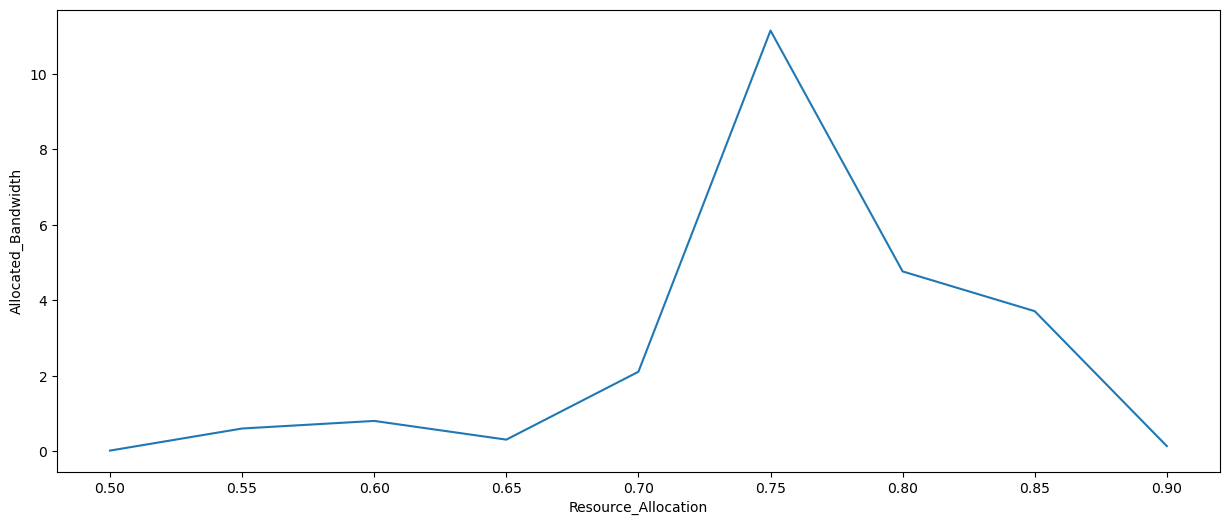

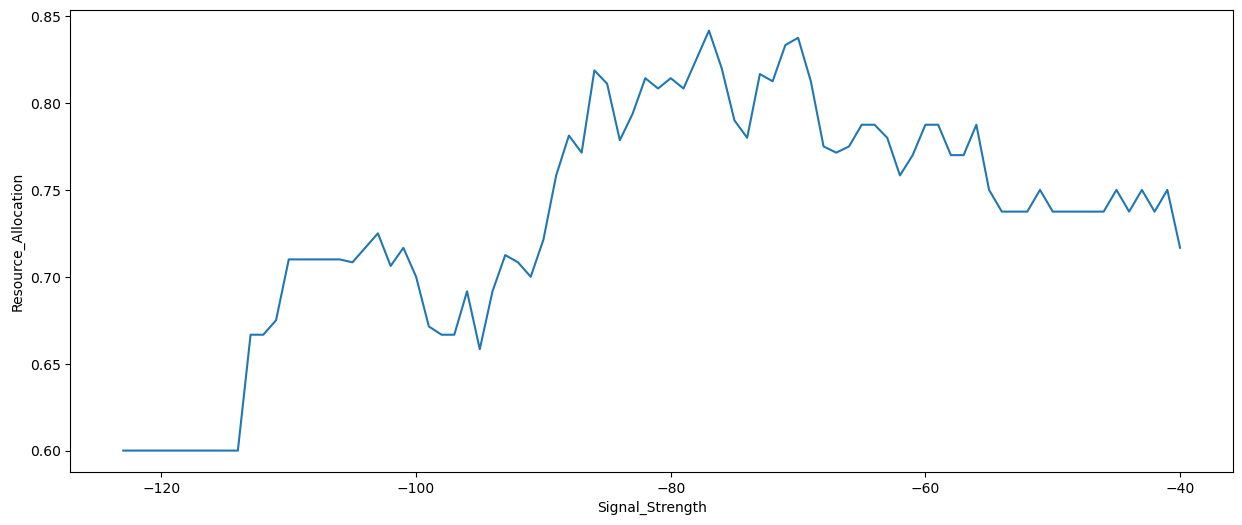

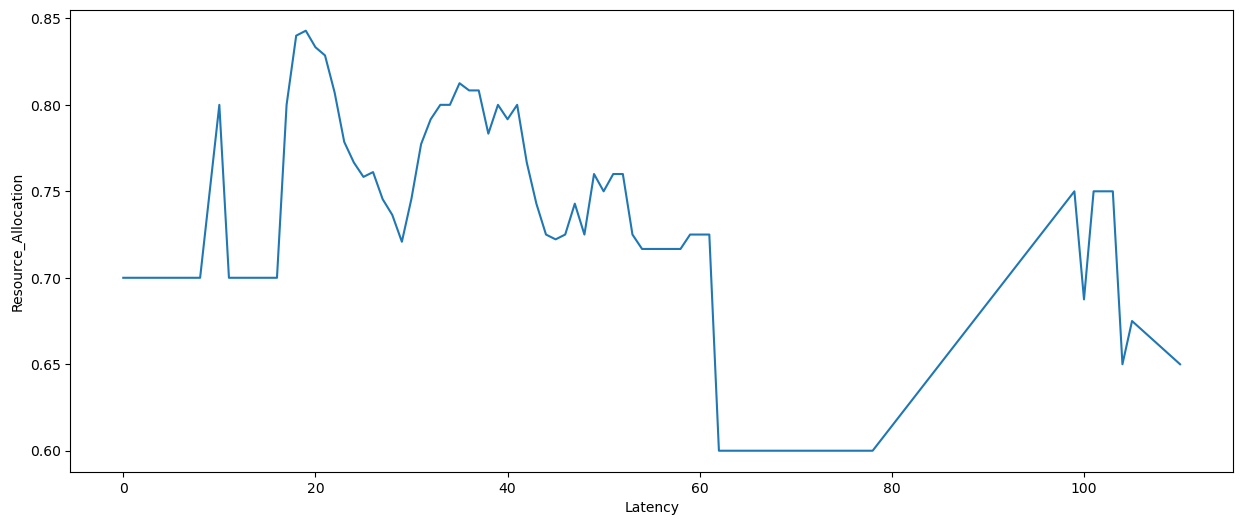

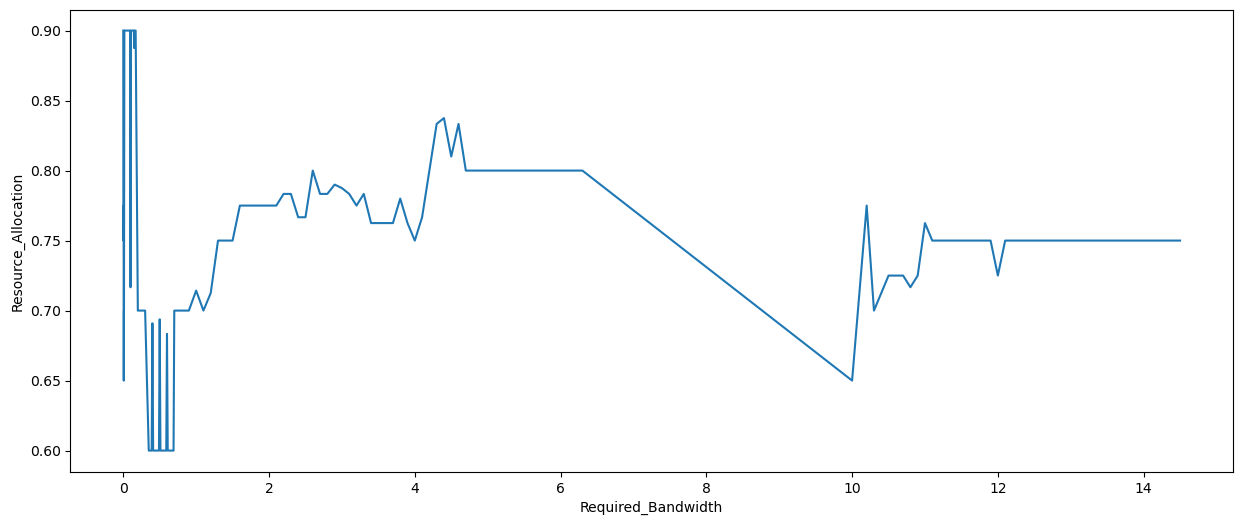

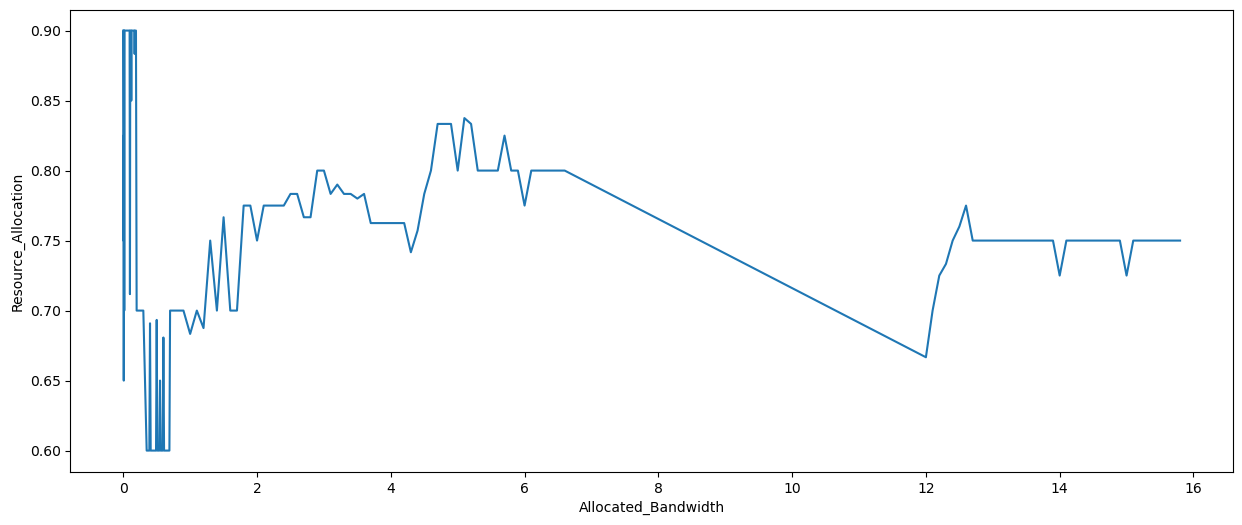

In [27]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df[j], y=df[i], data=df, ci=None, palette='hls')
            plt.show()

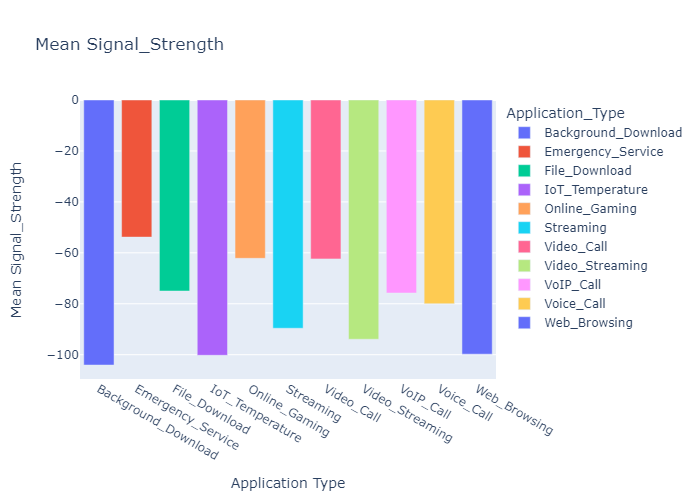

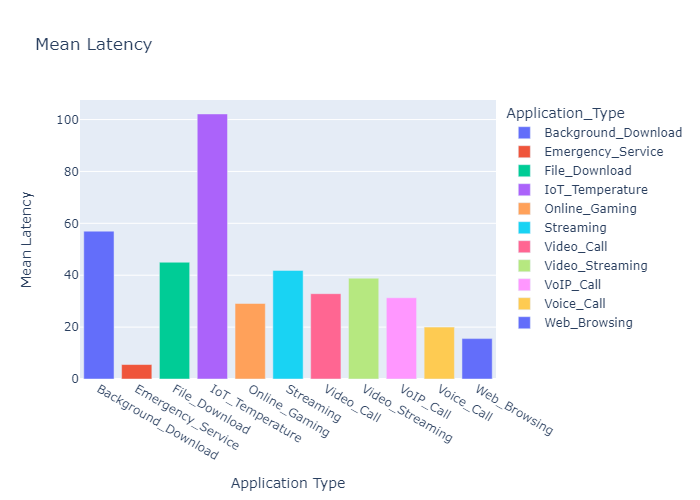

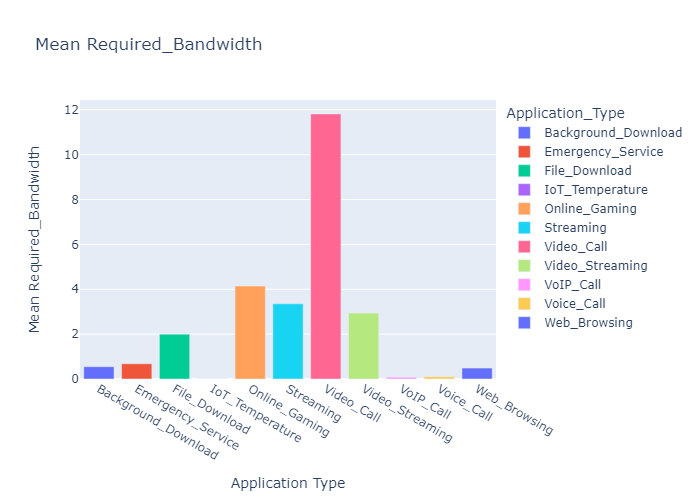

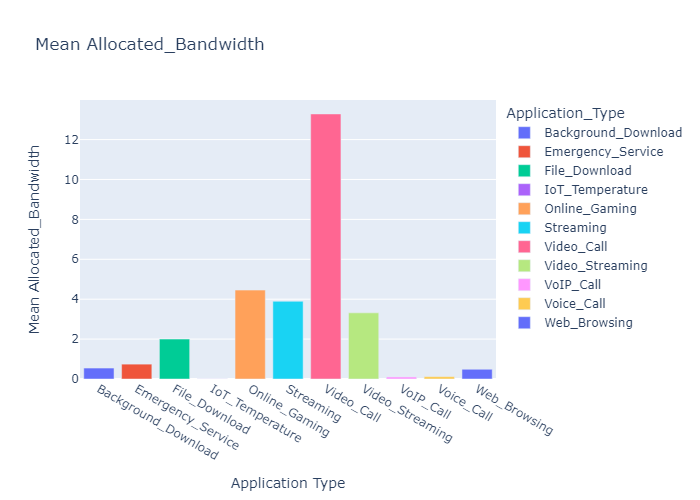

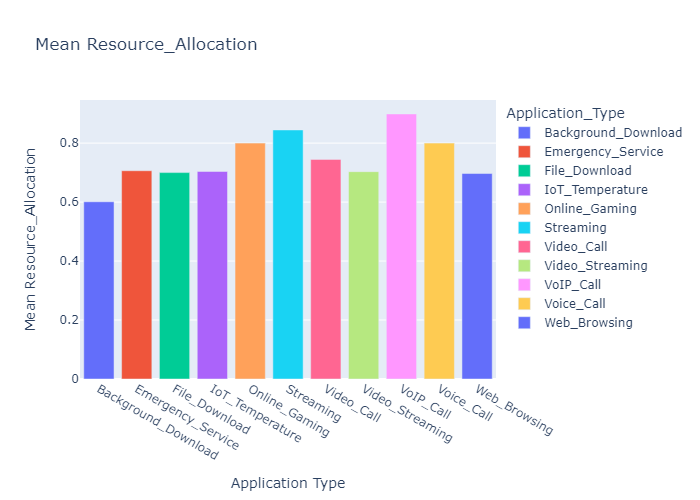

In [28]:

from IPython.display import Image, display

# Create a directory to save the images
image_dir = 'barplots'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Create and save bar plots as images
for i in numerical_columns:
    try:
        grouped_df = df.groupby('Application_Type')[i].mean().reset_index()
        fig = px.bar(grouped_df, x='Application_Type', y=i, color='Application_Type', title=f'Mean {i}')
        fig.update_layout(xaxis_title='Application Type', yaxis_title=f'Mean {i}')
        image_path = os.path.join(image_dir, f'{i}_mean_barplot.png')
        fig.write_image(image_path)
    except Exception as e:
        print(f"Error occurred while saving mean bar plot for {i}: {str(e)}")

# Display bar plots in the notebook
for i in numerical_columns:
    grouped_df = df.groupby('Application_Type')[i].mean().reset_index()
    fig = px.bar(grouped_df, x='Application_Type', y=i, color='Application_Type', title=f'Mean {i}')
    fig.update_layout(xaxis_title='Application Type', yaxis_title=f'Mean {i}')
    image_path = os.path.join(image_dir, f'{i}_mean_barplot.png')
    display(Image(filename=image_path))


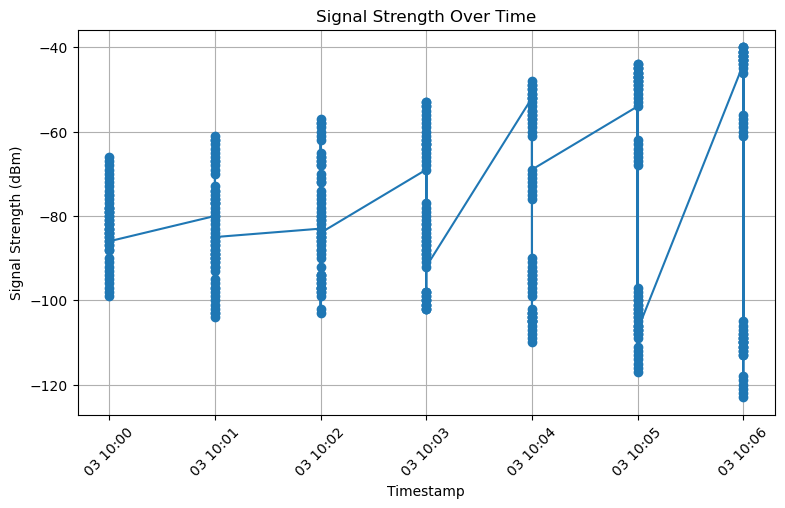

In [29]:
plt.figure(figsize=(9, 5))
plt.plot(df['Timestamp'], df['Signal_Strength'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Signal Strength (dBm)')
plt.title('Signal Strength Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

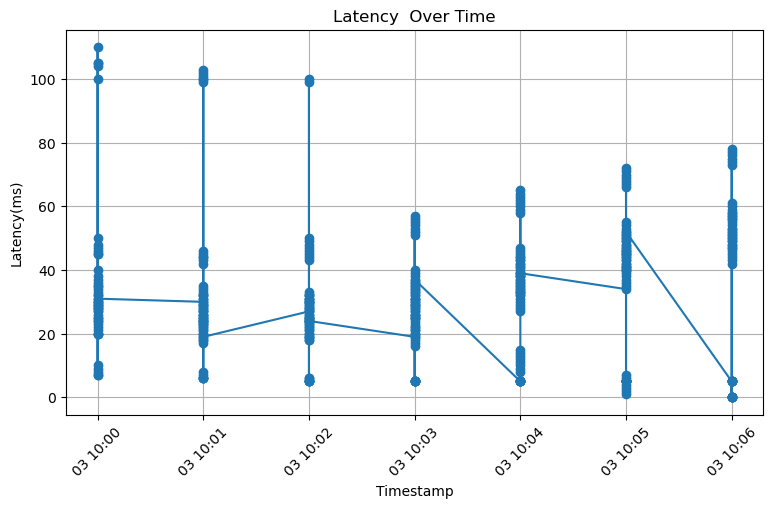

In [30]:
plt.figure(figsize=(9, 5))
plt.plot(df['Timestamp'], df['Latency'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Latency(ms)')
plt.title('Latency  Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

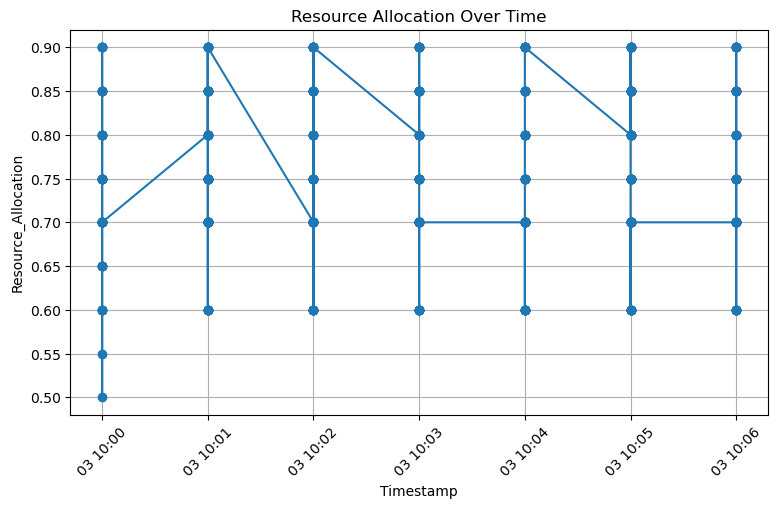

In [31]:
plt.figure(figsize=(9, 5))
plt.plot(df['Timestamp'], df['Resource_Allocation'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Resource_Allocation')
plt.title('Resource Allocation Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [32]:
# Calculate the correlation matrix for numerical columns in the DataFrame
correlation_matrix = df[numerical_columns].corr()

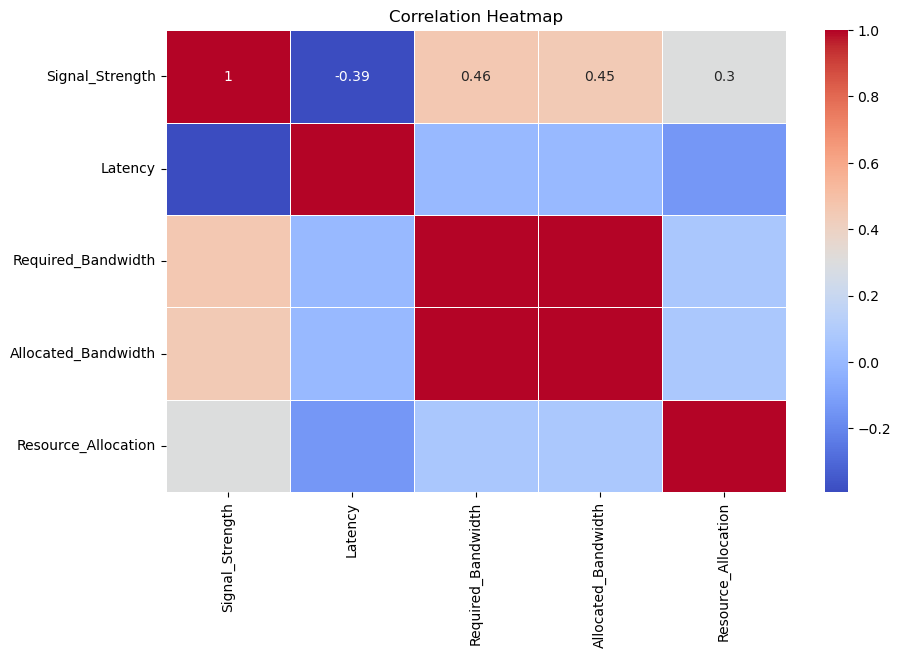

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
df['Efficiency_Ratio_Latency'] = df['Allocated_Bandwidth'] / df['Latency']
df['Resource_Performance'] = df['Resource_Allocation'] * df['Signal_Strength']

In [35]:
print(df[['Efficiency_Ratio_Latency', 'Resource_Performance']].head())

   Efficiency_Ratio_Latency  Resource_Performance
0                     0.500                -52.50
1                     0.006                -64.00
2                     0.150                -63.75
3                     0.150                -63.00
4                     0.120                -66.30


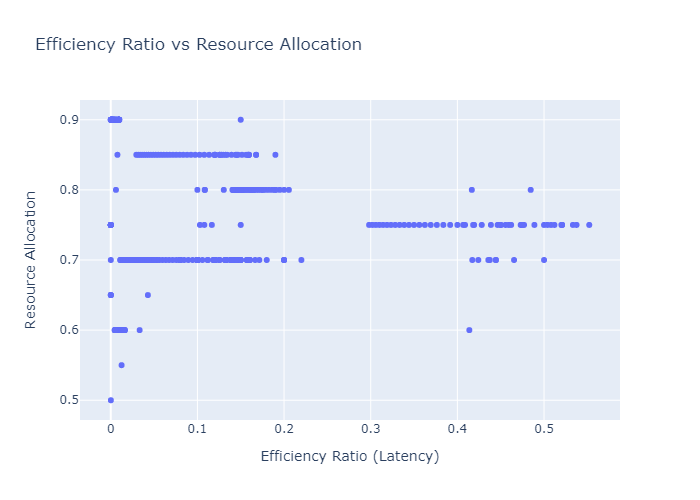

In [36]:

from IPython.display import Image, display

# Create a directory to save the images
image_dir = 'scatterplots'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Create and save scatter plot as an image
fig_efficiency = px.scatter(df, x='Efficiency_Ratio_Latency', y='Resource_Allocation', title='Efficiency Ratio vs Resource Allocation')
fig_efficiency.update_layout(xaxis_title='Efficiency Ratio (Latency)', yaxis_title='Resource Allocation')

image_path = os.path.join(image_dir, 'efficiency_vs_allocation_scatterplot.png')
fig_efficiency.write_image(image_path)

# Display scatter plot in the notebook
display(Image(filename=image_path))


In [37]:
# Import necessary modules for splitting data, building linear regression model, and evaluating model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X = df[['Signal_Strength', 'Required_Bandwidth']]
y = df['Resource_Allocation']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
LinearRegression()

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.007977063585505356
R-squared: 0.08959552499247925


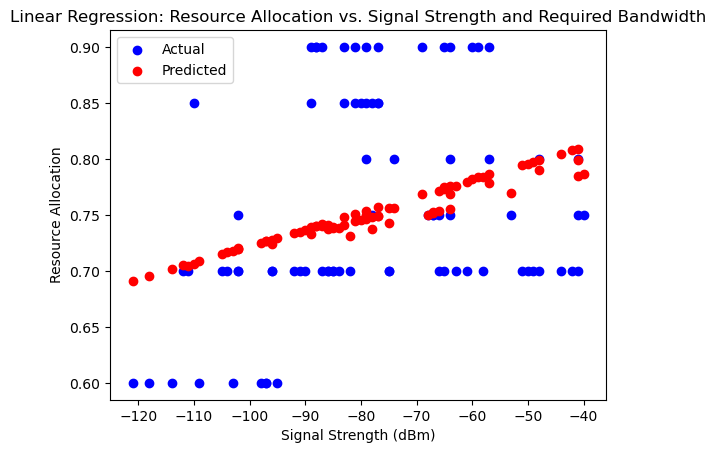

In [44]:
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Signal_Strength'], y_pred, color='red', label='Predicted')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Resource Allocation')
plt.legend()
plt.title('Linear Regression: Resource Allocation vs. Signal Strength and Required Bandwidth')
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [46]:
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [47]:
y_pred_poly = polyreg.predict(X_test)

In [48]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression - R-squared: {r2_poly}')


Polynomial Regression - Mean Squared Error: 0.0022993058333198695
Polynomial Regression - R-squared: 0.7375853536044374


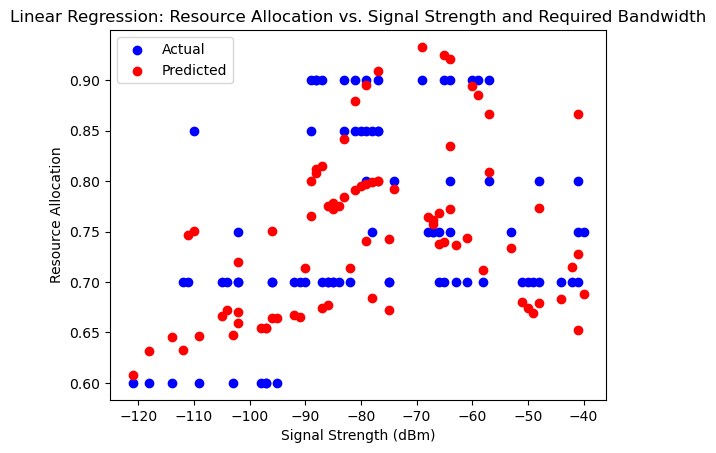

In [49]:
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Signal_Strength'], y_pred_poly, color='red', label='Predicted')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Resource Allocation')
plt.legend()
plt.title('Linear Regression: Resource Allocation vs. Signal Strength and Required Bandwidth')
plt.show()




In [50]:
df['Latency_Signal_Interaction'] = df['Latency'] * df['Signal_Strength']

In [51]:
X = df[['Latency', 'Latency_Signal_Interaction']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
mse_new_feature = mean_squared_error(y_test, y_pred)
r2_new_feature = r2_score(y_test, y_pred)
print(f'Mean Squared Error with New Feature: {mse_new_feature}')
print(f'R-squared with New Feature: {r2_new_feature}')

Mean Squared Error with New Feature: 0.006822902316122303
R-squared with New Feature: 0.22131737643114047


In [55]:
degree = 4
polyreg = PolynomialFeatures(degree)
X_poly_train = polyreg.fit_transform(X_train)
X_poly_test = polyreg.transform(X_test)

In [56]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [57]:
y_pred_poly = model.predict(X_poly_test)

In [58]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Mean Squared Error with Polynomial Feature: {mse_poly}')
print(f'R-squared with Polynomial Feature: {r2_poly}')

Mean Squared Error with Polynomial Feature: 0.004833483266664463
R-squared with Polynomial Feature: 0.44836533535459766
